<a href="https://colab.research.google.com/github/hmtrii/CS114.K21.KHTN/blob/master/predict_outcome_football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DỰ ĐOÁN KẾT QUẢ BÓNG ĐÁ BẰNG THUẬT TOÁN MÁY HỌC**


##**1. Giới thiệu bài toán**
Trong bóng đá và các môn thể thao khác, kết quả của một trận đấu luôn bị ảnh hưởng bởi rất nhiều yếu tố khác nhau như phong độ, tình hình sức khỏe của các cầu thủ, chiến thuật, huấn luận viên, thời tiết, sân thi đấu,… và có cả yếu tố may mắn. Vì thế việc dự đoán kết quả một trân đấu thể thao đã luôn đặt nhiều thách thức và khó khăn cho cả những chuyên gia thể thao cũng như cho cả máy tính. Trong đồ án này, việc dự đoán kết quả một trân đấu bóng đá sẽ sử dụng các yếu tố: chỉ số của cầu thủ từ FIFA và những thông số về lịch sử đấu của các đội bóng. Các thuật toán máy học phổ biến như K-Nearest-Neighbor, Logistic Regresion, Support Vector Machine và Neural Network được áp dụng để đưa ra dự đoán kết quả cho đội chủ nhà là thắng, hòa hoặc thua.




##**2. Ứng dụng và mục tiêu**
- Cá cược thể thao đặc biệt là bóng đá đã được hợp pháp ở nhiều quốc gia như Anh, Mỹ, Úc, Hà Lan, Thụy Sĩ, …Thị trường cá cược ở Mỹ được dự kiến sẽ đạt 8 tỷ USD vào năm 2025 (theo trang báo [MarketWatch](https://www.marketwatch.com/story/firms-say-sports-betting-market-to-reach-8-billion-by-2025-2019-11-04)). Ở Việt Nam, theo nghị đinh 06/2017/NĐ-CP, Chính phủ đã cho phép thí điểm đặt cược bóng đá quốc tế. Nhưng trong đó vẫn còn một số khuất mắc nên chưa có doanh nghiệp nào vào cuộc. Tuy nhiên có thể thấy việc hợp pháp đặt cược bóng đã sẽ được tiến hành và phát triển ở Việt Nam trong một tương lai không xa.

- Mục tiêu của đồ án là đưa ra dự đoán kết quả của một trận đấu bóng đá ở các giải vô địch quốc gia hàng đầu Châu Âu. Dự đoán này mong muốn sẽ giúp ích cho các doanh nghiệp khi phát triển thị trường cá cược bóng đá và giúp ích cho cả người chơi.

- Đồ án cũng giúp tìm ra thuật toán nào là phù hợp cho bộ dữ liệu có được. Tìm hiểu xem những chỉ số đánh giá cầu thủ từ FIFA có ảnh hưởng đến kết quả trận đấu như thế nào.









# **IMPORT**

In [ ]:
!git clone https://github.com/hmtrii/CS114.K21.KHTN

fatal: destination path 'CS114.K21.KHTN' already exists and is not an empty directory.


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# **Dữ liệu**

##1.Mô tả dữ liệu
Bài toán sử dụng dữ liệu trong 10 mùa giải (2010-2020) (đối với mùa 2020 tính đến 7/2020) của 4 giải vô địch quốc gia hàng đầu Châu Âu bao gồm: Premier League (Anh), Laliga (Tây Ban Nha), SerieA (Ý) và Bundesliga (Đức). 

Dữ liệu được thu thập chia làm 2 nhóm: dữ liệu của các cầu thủ và dữ liệu của các trận đấu:
- Dữ liệu của các cầu thủ mà thành phần chủ yếu là các chỉ số đánh giá từ trò chơi FIFA. Đây là một trò chơi của hãng Electronic Arts, nó có tính phổ biến và uy tín trên toàn thế giới nên có thể chọn những chỉ số đánh giá cầu thủ của trò chơi này để làm đầu vào cho bài toán. Trò chơi này bao gồm dữ liệu của các cầu thủ ở các giải đấu quốc gia hàng đầu Châu Âu và được cập nhật qua hàng năm, đáp ứng được sự thay đổi phong độ và thay đổi câu lạc bộ của các cầu thủ. Bên cạnh các chỉ số đánh giá, chúng ta còn thu thập thêm dữ liệu về tên cầu thủ, tên đội đang thi đấu, vị trí thi đấu, số áo thi đấu, tuổi và mùa giải thi đấu tương ứng. Toàn bộ dữ liệu này được lấy về từ trang web https://www.fifaindex.com/.
- Dữ liệu trận đấu bao gồm tên 2 đội bóng, thời điểm thi đấu, đội hình ra sân và số bàn thắng mà 2 đội ghi được. Những dữ liệu này được lấy về từ trang báo https://www.skysports.com/. Đây là trang báo về thể thao lớn ở nước Anh nên có tính chính xác và tin cậy cao.

Để đáp ứng về việc chuyển nhượng cầu thủ, phong độ của đội bóng và cầu thủ ở các mùa giải khác nhau thì dù cùng là một đội bóng, một cầu thủ nhưng ở các mùa giải khác nhau sẽ xem như là khác nhau.

Sử dụng 2 công cụ Web scrapper và Scrapy để lấy dữ liệu từ các trang web. Lưu 2 nhóm dữ liệu dưới định dạng file csv.

Kích thước bộ dữ liệu bao gồm 15.045 trận đấu và 26.227 cầu thủ trong 10 mùa giải.


##2.Load data

###Dữ liệu cầu thủ


In [ ]:
player_data = pd.read_csv('/content/CS114.K21.KHTN/Project/Data/players.csv')
player_data.head()

,name,team,position,rating,number,age,season
0,wayne-hennessey-fifa-12,wolverhampton-wanderers,GK,77,1,25,fifa12
1,richard-stearman-fifa-12,wolverhampton-wanderers,RB,72,5,24,fifa12
2,roger-johnson-fifa-12,wolverhampton-wanderers,RCB,75,14,28,fifa12
3,sebastien-bassong-fifa-12,wolverhampton-wanderers,LCB,75,21,25,fifa12
4,stephen-ward-fifa-12,wolverhampton-wanderers,LB,73,11,26,fifa12


In [ ]:
player_data = player_data.dropna()
player_data = player_data.drop_duplicates()
player_data

,name,team,position,rating,number,age,season
0,wayne-hennessey-fifa-12,wolverhampton-wanderers,GK,77,1,25,fifa12
1,richard-stearman-fifa-12,wolverhampton-wanderers,RB,72,5,24,fifa12
2,roger-johnson-fifa-12,wolverhampton-wanderers,RCB,75,14,28,fifa12
3,sebastien-bassong-fifa-12,wolverhampton-wanderers,LCB,75,21,25,fifa12
4,stephen-ward-fifa-12,wolverhampton-wanderers,LB,73,11,26,fifa12
...,...,...,...,...,...,...,...
23864,riccardo-anedda-fifa-13,cagliari,GK,59,26,20,fifa13
23865,danilo-avelar-fifa-13,cagliari,LB,73,8,24,fifa13
23866,michele-chelo-fifa-13,cagliari,ST,60,36,20,fifa13
23867,matteo-contini-fifa-13,atalanta,CB,70,22,33,fifa13


Text(0, 0.5, 'Number players')

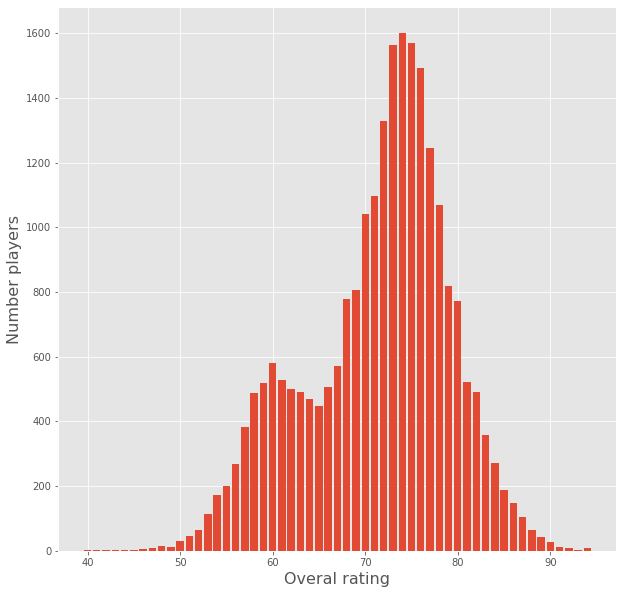

In [ ]:
max_ovr = player_data['rating'].max()
min_ovr = player_data['rating'].min()

ovr_values = list(range(min_ovr, max_ovr + 1))
ovr_frequent = [0] * (max_ovr - min_ovr + 1)
for ovr in player_data['rating']:
  ovr_frequent[ovr - min_ovr] += 1

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(ovr_values, ovr_frequent)
plt.xlabel('Overal rating', fontsize=16)
plt.ylabel('Number players', fontsize=16)

###Dữ liệu trận đấu

In [ ]:
matches_data = pd.read_csv('/content/CS114.K21.KHTN/Project/Data/lineups.csv')
matches_data.head()

,date,home_team,away_team,home_goals,away_goals,home_lineups,away_lineups
0,30th March 2013,sunderland,manchester-united,0,1,"22,2,19,16,3,21,8,4,23,28,9","1,2,15,12,28,7,16,8,18,26,20"
1,25th November 2012,atletico-madrid,sevilla,4,0,"13,20,23,2,3,10,5,14,6,9,19","1,21,2,4,3,12,22,7,11,19,20"
2,27th November 2016,cagliari,udinese,2,1,"30,3,23,2,19,18,8,20,17,25,22","1,27,2,5,53,14,26,6,19,9,77"
3,25th September 2010,arsenal,west-bromwich-albion,2,3,"1,3,18,6,22,17,2,27,8,23,29","1,36,6,3,20,21,33,11,7,14,24"
4,15th January 2011,wigan-athletic,fulham,1,1,"26,23,5,3,2,8,10,6,21,31,20","12,4,5,6,18,29,20,13,16,23,15"


In [ ]:
matches_data = matches_data.dropna()
matches_data = matches_data.drop_duplicates()
matches_data

,date,home_team,away_team,home_goals,away_goals,home_lineups,away_lineups
0,30th March 2013,sunderland,manchester-united,0,1,"22,2,19,16,3,21,8,4,23,28,9","1,2,15,12,28,7,16,8,18,26,20"
1,25th November 2012,atletico-madrid,sevilla,4,0,"13,20,23,2,3,10,5,14,6,9,19","1,21,2,4,3,12,22,7,11,19,20"
2,27th November 2016,cagliari,udinese,2,1,"30,3,23,2,19,18,8,20,17,25,22","1,27,2,5,53,14,26,6,19,9,77"
3,25th September 2010,arsenal,west-bromwich-albion,2,3,"1,3,18,6,22,17,2,27,8,23,29","1,36,6,3,20,21,33,11,7,14,24"
4,15th January 2011,wigan-athletic,fulham,1,1,"26,23,5,3,2,8,10,6,21,31,20","12,4,5,6,18,29,20,13,16,23,15"
...,...,...,...,...,...,...,...
13674,8th April 2017,cologne,m-gladbach,2,3,"1,24,4,3,14,6,33,17,8,34,27","1,30,3,4,17,23,8,5,10,11,13"
13675,23rd August 2015,palermo,genoa,1,0,"70,2,12,34,3,27,28,18,7,21,20","23,4,8,15,90,20,33,93,18,22,21"
13676,3rd February 2012,fc-nurnberg,borussia-dortmund,0,2,"1,13,6,38,20,7,23,18,2,9,8","1,4,29,15,22,16,23,5,9,19,26"
13677,22nd January 2018,juventus,genoa,1,0,"23,26,4,3,12,6,5,14,11,9,17","1,5,2,13,20,30,40,8,93,11,19"


# **Tiền xử lí dữ liệu**

##**1.Chuẩn hóa dữ liệu**

  

  


###a. Xử lí chênh lệch và đồng bộ tên đội bóng ở 2 nhóm dữ liệu

In [ ]:
  player_teams = player_data.team.unique()
  print(f"Number teams in player_data: {len(player_teams)}")

Number teams in player_data: 195


In [ ]:
matches_home_teams = matches_data.home_team.unique()
matches_away_teams = matches_data.away_team.unique()
print(f"Number home teams: {len(matches_home_teams)}")
print(f"NUmber away teams: {len(matches_away_teams)}")

Number home teams: 133
NUmber away teams: 133


Ta thấy có sự chênh lệch về số đội bóng ở 2 nhóm dữ liệu: trong nhóm dữ liệu các cầu thủ có số đội bóng là 195 đội trong khi ở nhóm dữ liệu các trận đấu chỉ có 133 đội.

  - Chênh lệch này do một số đội bóng đổi tên qua các mùa giải. Ví dụ như trong nhóm dữ liệu cầu thủ, đội Barcelona của Laliga được lưu dưới 2 cái tên: fc-barcelona và f-c-barcelona.

  - Bên cạnh đó còn có sự khác biệt tên của cùng một đội bóng ở 2 nhóm dữ liệu do 2 trang web quản lí tên đội khác nhau. Ví dụ như ở nhóm dữ liệu các cầu thủ tên đội chỉ là là inter trong khi ở nhóm dữ liệu các trận đấu tên của đội này là inter-milan.
Để đồng bộ cùng một đội bóng với nhau, tiến hành đánh số ID cho các đội, lấy tên các đội bóng trong nhóm các trận đấu làm chuẩn vì trong nhóm dữ liệu này, tên đội không bị thay đổi qua các mùa giải. Các đội sẽ có ID từ 0-132.

Để đồng bộ cùng một đội bóng với nhau, tiến hành đánh số ID cho các đội, lấy tên các đội bóng trong nhóm dữ liệu các trận đấu làm chuẩn vì trong nhóm dữ liệu này, tên đội không bị thay đổi qua các mùa giải. Các đội sẽ có ID từ 0-132.

In [ ]:
team_id = {}
id = 0
for team in matches_home_teams:
  if team not in team_id.keys():
    team_id[team] = id
    id += 1
print(team_id)

{'sunderland': 0, 'atletico-madrid': 1, 'cagliari': 2, 'arsenal': 3, 'wigan-athletic': 4, 'bolton-wanderers': 5, 'leicester-city': 6, 'everton': 7, 'roma': 8, 'bayer-leverkusen': 9, 'bayern-munich': 10, 'rayo-vallecano': 11, 'mainz': 12, 'schalke': 13, 'liverpool': 14, 'siena': 15, 'west-bromwich-albion': 16, 'wolfsburg': 17, 'fiorentina': 18, 'espanyol': 19, 'levante': 20, 'malaga': 21, 'newcastle-united': 22, 'napoli': 23, 'bologna': 24, 'fc-nurnberg': 25, 'sd-huesca': 26, 'granada': 27, 'blackpool': 28, 'chelsea': 29, 'osasuna': 30, 'crystal-palace': 31, 'southampton': 32, 'fortuna-dusseldorf': 33, 'fc-augsburg': 34, 'hull-city': 35, 'chievo': 36, 'sc-freiburg': 37, 'real-betis': 38, 'hannover-96': 39, 'eintracht-braunschweig': 40, 'hertha-berlin': 41, 'palermo': 42, 'lecce': 43, 'bari': 44, 'fulham': 45, 'juventus': 46, 'udinese': 47, 'empoli': 48, 'lazio': 49, 'bournemouth': 50, 'atalanta': 51, 'hoffenheim': 52, 'norwich-city': 53, 'sevilla': 54, 'sampdoria': 55, 'west-ham-united'

Áp dụng các chỉ số trên vào bảng player_data.

In [ ]:
id_column = []
for player_team in player_data['team']:
  if player_team == 'brighton-hove-albion':
    id_column.append(team_id['brighton-and-hove-albion'])

  elif player_team in ['fc-barcelona', 'f-c-barcelona']:
    id_column.append(team_id['barcelona'])

  elif player_team in ['club-atletico-de-madrid', 'club-atletico-de-madrid-s-a-d', 'atletico-de-madrid']:
    id_column.append(team_id['atletico-madrid'])
    
  elif player_team in ['athletic-club-de-bilbao', 'athletic-club']:
    id_column.append(team_id['athletic-bilbao'])

  elif player_team in ['real-club-celta-de-vigo', 'rc-celta-de-vigo', 'rc-celta']:
    id_column.append(team_id['celta-vigo'])
    
  elif player_team in ['rcd-espanyol-de-barcelona', 'r-c-d-espanyol-de-barcelona-s-a-d']:
    id_column.append(team_id['espanyol'])
    
  elif player_team in ['r-valladolid-cf']:
    id_column.append(team_id['real-valladolid'])
  
  elif player_team in ['rcd-mallorca', 'real-club-deportivo-mallorca-s-a-d', 'real-club-deportivo-mallorca', 'r-c-d-mallorca']:
    id_column.append(team_id['real-mallorca'])

  elif player_team in ['real-club-deportivo-de-la-coruna', 'rc-deportivo-de-la-coruna', 'real-club-deportivo-de-la-coruna-s-a-d', 'r-c-deportivo']:
    id_column.append(team_id['deportivo-la-coruna'])
  
  elif player_team in ['real-sporting-de-gijon', 'real-sporting-de-gijon-s-a-d']:
    id_column.append(team_id['sporting-gijon'])

  elif player_team in ['real-racing-club-s-a-d', 'racing-club-de-lens', 'real-racing-club']:
    id_column.append(team_id['racing-santander'])
  
  elif player_team in ['bayern-munchen', 'fc-bayern-munich', 'fc-bayern-munchen']:
    id_column.append(team_id['bayern-munich'])

  elif player_team in ['bayer-04-leverkusen']:
    id_column.append(team_id['bayer-leverkusen'])
  
  elif player_team in ['borussia-m-gladbach', 'borussia-monchengladbach']:
    id_column.append(team_id['m-gladbach'])

  elif player_team in ['hertha-bsc', 'hertha-bsc-berlin']:
    id_column.append(team_id['hertha-berlin'])
  
  elif player_team in ['1-fc-koln']:
    id_column.append(team_id['cologne'])
  
  elif player_team in ['sport-club-freiburg']:
    id_column.append(team_id['sc-freiburg'])
  
  elif player_team in ['inter']:
    id_column.append(team_id['inter-milan'])
  
  elif player_team in ['milan']:
    id_column.append(team_id['ac-milan'])

  elif player_team in ['chievo-verona']:
    id_column.append(team_id['chievo'])

  elif player_team in ['1-fc-nurnberg', '1-fc-nuremberg']:
    id_column.append(team_id['fc-nurnberg'])

  else:
    f = 0
    for team_name in team_id.keys():
      if (player_team == team_name) or (team_name in player_team):
        id_column.append(team_id[team_name])
        break
    
# print(len(id_column))
# print(id_column)

In [ ]:
player_data['team_id'] = id_column
player_data

,name,team,position,rating,number,age,season,team_id
0,wayne-hennessey-fifa-12,wolverhampton-wanderers,GK,77,1,25,fifa12,84
1,richard-stearman-fifa-12,wolverhampton-wanderers,RB,72,5,24,fifa12,84
2,roger-johnson-fifa-12,wolverhampton-wanderers,RCB,75,14,28,fifa12,84
3,sebastien-bassong-fifa-12,wolverhampton-wanderers,LCB,75,21,25,fifa12,84
4,stephen-ward-fifa-12,wolverhampton-wanderers,LB,73,11,26,fifa12,84
...,...,...,...,...,...,...,...,...
23864,riccardo-anedda-fifa-13,cagliari,GK,59,26,20,fifa13,2
23865,danilo-avelar-fifa-13,cagliari,LB,73,8,24,fifa13,2
23866,michele-chelo-fifa-13,cagliari,ST,60,36,20,fifa13,2
23867,matteo-contini-fifa-13,atalanta,CB,70,22,33,fifa13,51


###b. Thêm các thông tin cần thiết cho bảng dữ liệu

In [ ]:
# Lấy thông tin của mùa giải từ ngày thi đấu
def extract_season(date):
  month = date.split(' ')[1]
  year = date.split(' ')[2][-2:]

  if month in ['August', 'September', 'October', 'November', 'December']:
    return int(year) + 1
  else:
    return int(year)

print(extract_season('25th September 2010'))

11


In [ ]:
# Thêm các cột chỉ số của 2 đội bóng, kết quả trân đấu và mùa giải cho bảng dữ liệu matches_data

home_id = []
away_id = []
results = []
seasons = []

for match in matches_data.values:
  home_id.append(team_id[match[1]])
  away_id.append(team_id[match[2]])

  # result
  if match[3] > match[4]:
    results.append(1)
  elif match[3] < match[4]:
    results.append(-1)
  else:
    results.append(0)

  # season
  seasons.append(extract_season(match[0]))


matches_data['home_id'] = home_id
matches_data['away_id'] = away_id
matches_data['result'] = results
matches_data['season'] = seasons
matches_data

,date,home_team,away_team,home_goals,away_goals,home_lineups,away_lineups,home_id,away_id,result,season
0,30th March 2013,sunderland,manchester-united,0,1,"22,2,19,16,3,21,8,4,23,28,9","1,2,15,12,28,7,16,8,18,26,20",0,90,-1,13
1,25th November 2012,atletico-madrid,sevilla,4,0,"13,20,23,2,3,10,5,14,6,9,19","1,21,2,4,3,12,22,7,11,19,20",1,54,1,13
2,27th November 2016,cagliari,udinese,2,1,"30,3,23,2,19,18,8,20,17,25,22","1,27,2,5,53,14,26,6,19,9,77",2,47,1,17
3,25th September 2010,arsenal,west-bromwich-albion,2,3,"1,3,18,6,22,17,2,27,8,23,29","1,36,6,3,20,21,33,11,7,14,24",3,16,-1,11
4,15th January 2011,wigan-athletic,fulham,1,1,"26,23,5,3,2,8,10,6,21,31,20","12,4,5,6,18,29,20,13,16,23,15",4,45,0,11
...,...,...,...,...,...,...,...,...,...,...,...
13674,8th April 2017,cologne,m-gladbach,2,3,"1,24,4,3,14,6,33,17,8,34,27","1,30,3,4,17,23,8,5,10,11,13",96,83,-1,17
13675,23rd August 2015,palermo,genoa,1,0,"70,2,12,34,3,27,28,18,7,21,20","23,4,8,15,90,20,33,93,18,22,21",42,69,1,16
13676,3rd February 2012,fc-nurnberg,borussia-dortmund,0,2,"1,13,6,38,20,7,23,18,2,9,8","1,4,29,15,22,16,23,5,9,19,26",25,80,-1,12
13677,22nd January 2018,juventus,genoa,1,0,"23,26,4,3,12,6,5,14,11,9,17","1,5,2,13,20,30,40,8,93,11,19",46,69,1,18


###c.Tổ chức quản lí các đối tượng

Một cầu thủ có các thông tin sau:

```
Player {
	‘name’: player’s name,
	‘pos’: player’s position,
	‘ovr’: player’s overal rating,
	‘age’: player’s age,
}
```

In [ ]:
def create_dict_player(row):
  player = {}
  player['name'] = row[0].replace('-' + row[0].split('-')[-2]
                                  + '-' + row[0].split('-')[-1], '')
  player['pos'] = row[2]
  player['ovr'] = row[3]
  player['age'] = row[5]

  return player

print(create_dict_player(player_data.values[0]))

{'name': 'wayne-hennessey', 'pos': 'GK', 'ovr': 77, 'age': 25}


Một đội bóng có các thông tin sau:
```
Team {
	Number player 1: {player 1},
	Number player 2: {player 2},
	Number player 3: {player 3},
	…
}
```

In [ ]:
teams = {}
for row in player_data.values:
  teamId_season = str(row[7]) + '-' + row[6][-2:]
  if teamId_season not in teams.keys():
    teams[teamId_season] = {}
    teams[teamId_season][row[4]] = create_dict_player(row)
  else:
    teams[teamId_season][row[4]] = create_dict_player(row)

In [ ]:
# Chelsea - 2019
for number, info in teams['29-19'].items():
  print(number, info)

1 {'name': 'kepa', 'pos': 'GK', 'ovr': 84, 'age': 24}
28 {'name': 'azpilicueta', 'pos': 'RB', 'ovr': 85, 'age': 30}
27 {'name': 'andreas-christensen', 'pos': 'RCB', 'ovr': 80, 'age': 23}
30 {'name': 'david-luiz', 'pos': 'LCB', 'ovr': 83, 'age': 32}
3 {'name': 'marcos-alonso', 'pos': 'LB', 'ovr': 83, 'age': 28}
7 {'name': 'n-golo-kante', 'pos': 'RCM', 'ovr': 89, 'age': 28}
5 {'name': 'jorginho', 'pos': 'CM', 'ovr': 83, 'age': 27}
12 {'name': 'ruben-loftus-cheek', 'pos': 'LCM', 'ovr': 78, 'age': 23}
11 {'name': 'pedro', 'pos': 'RW', 'ovr': 82, 'age': 32}
9 {'name': 'gonzalo-higuain', 'pos': 'ST', 'ovr': 87, 'age': 31}
10 {'name': 'eden-hazard', 'pos': 'LW', 'ovr': 91, 'age': 28}
22 {'name': 'willian', 'pos': 'RW', 'ovr': 84, 'age': 31}
18 {'name': 'olivier-giroud', 'pos': 'ST', 'ovr': 82, 'age': 32}
6 {'name': 'danny-drinkwater', 'pos': 'CM', 'ovr': 78, 'age': 29}
20 {'name': 'callum-hudson-odoi', 'pos': 'LW', 'ovr': 71, 'age': 18}
44 {'name': 'ethan-ampadu', 'pos': 'CB', 'ovr': 65, 'age

Một trận đấu có các thông tin sau:
```
Match {
	‘date’: date,
	‘home_id’: home team’s ID,
	‘away_id’: away team’s ID,
	‘home_goals’: goals of home team,
	‘away_goals’: goals of away team,
}
```

In [ ]:
team_matches = {}

for row in matches_data.values:
  homeId_season = str(row[7]) + '-' + str(row[10])
  awayId_season = str(row[8]) + '-' + str(row[10])

  match_info = {}
  match_info['date'] = row[0]
  match_info['home_id'] = row[7]
  match_info['away_id'] = row[8]
  match_info['home_goals'] = row[3]
  match_info['away_goals'] = row[4]

  if homeId_season not in team_matches.keys():
    team_matches[homeId_season] = []
  team_matches[homeId_season].append(match_info)

  if awayId_season not in team_matches.keys():
    team_matches[awayId_season] = []
  team_matches[awayId_season].append(match_info)

In [ ]:
# Chelsea-2019
print("Matches of Chelsea team in season 2019:")
for match in team_matches['29-19']:
  print(match)

Matches of Chelsea team in season 2019:
{'date': '3rd March 2019', 'home_id': 45, 'away_id': 29, 'home_goals': 1, 'away_goals': 2}
{'date': '2nd January 2019', 'home_id': 29, 'away_id': 32, 'home_goals': 0, 'away_goals': 0}
{'date': '15th September 2018', 'home_id': 29, 'away_id': 126, 'home_goals': 4, 'away_goals': 1}
{'date': '2nd December 2018', 'home_id': 29, 'away_id': 45, 'home_goals': 2, 'away_goals': 0}
{'date': '26th August 2018', 'home_id': 22, 'away_id': 29, 'home_goals': 1, 'away_goals': 2}
{'date': '11th November 2018', 'home_id': 29, 'away_id': 7, 'home_goals': 0, 'away_goals': 0}
{'date': '16th December 2018', 'home_id': 115, 'away_id': 29, 'home_goals': 1, 'away_goals': 2}
{'date': '5th December 2018', 'home_id': 84, 'away_id': 29, 'home_goals': 2, 'away_goals': 1}
{'date': '12th May 2019', 'home_id': 6, 'away_id': 29, 'home_goals': 0, 'away_goals': 0}
{'date': '7th October 2018', 'home_id': 32, 'away_id': 29, 'home_goals': 0, 'away_goals': 3}
{'date': '3rd April 2019',

Các trận đấu này sẽ được sắp xếp tăng dần theo ngày từ đầu đến cuối mùa giải, nhằm thuận lợi cho việc xây dựng các đặc trưng về lịch sử đấu.

In [ ]:
def compare_date(date1, date2):
  # return 1 if date1 > date2, -1 if date1 < date2, 0 if date1 = date2

  if date1 == date2:
    return 0

  date_1 = int(date1.split(' ')[0][:-2])
  month_1 = date1.split(' ')[1]
  year_1 = int(date1.split(' ')[2])

  date_2 = int(date2.split(' ')[0][:-2])
  month_2 = date2.split(' ')[1]
  year_2 = int(date2.split(' ')[2])

  months = ['August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June', 'July']

  if year_1 > year_2:
    return 1

  if year_1 < year_2:
    return -1
  
  if months.index(month_1) > months.index(month_2):
    return 1
    
  if months.index(month_1) < months.index(month_2):
    return -1
  
  if date_1 > date_2:
    return 1

  if date_1 < date_2:
    return -1

In [ ]:
def sort_matches(list_matches):
  for i in range(0, len(list_matches) - 1):
    for j in range(i+1, len(list_matches)):
      date1 = list_matches[i]['date']
      date2 = list_matches[j]['date']
      if compare_date(date1, date2) == 1:
        list_matches[i], list_matches[j] = list_matches[j], list_matches[i]

  return list_matches

In [ ]:
# Sắp xếp các trân đấu theo thứ tự tăng dần dựa theo ngày
for teamId_season in team_matches.keys():
  team_matches[teamId_season] = sort_matches(team_matches[teamId_season])

In [ ]:
# Chelsea-2019
print("Matches of Chelsea team in season 2019:")
for match in team_matches['29-19']:
  print(match)

Matches of Chelsea team in season 2019:
{'date': '11th August 2018', 'home_id': 105, 'away_id': 29, 'home_goals': 0, 'away_goals': 3}
{'date': '18th August 2018', 'home_id': 29, 'away_id': 3, 'home_goals': 3, 'away_goals': 2}
{'date': '26th August 2018', 'home_id': 22, 'away_id': 29, 'home_goals': 1, 'away_goals': 2}
{'date': '1st September 2018', 'home_id': 29, 'away_id': 50, 'home_goals': 2, 'away_goals': 0}
{'date': '15th September 2018', 'home_id': 29, 'away_id': 126, 'home_goals': 4, 'away_goals': 1}
{'date': '23rd September 2018', 'home_id': 56, 'away_id': 29, 'home_goals': 0, 'away_goals': 0}
{'date': '29th September 2018', 'home_id': 29, 'away_id': 14, 'home_goals': 1, 'away_goals': 1}
{'date': '7th October 2018', 'home_id': 32, 'away_id': 29, 'home_goals': 0, 'away_goals': 3}
{'date': '20th October 2018', 'home_id': 29, 'away_id': 90, 'home_goals': 2, 'away_goals': 2}
{'date': '28th October 2018', 'home_id': 98, 'away_id': 29, 'home_goals': 0, 'away_goals': 4}
{'date': '4th No

#**Xây dựng đặc trưng**

##1.Đặc trưng về chỉ số đánh giá

Chỉ số đánh giá của các cầu thủ được dùng làm đặc trưng cho các trận đấu. 

Tuy nhiên, vì trong bóng đá, yếu tố đội hình cũng như vị trí thi đấu của các cầu thủ trên sân thể hiện tính chiến thuật của mỗi đội và có ảnh hưởng lớn đến kết quả trận đấu. Bóng đá có độ đa dạng về đội hình thi đấu như: 4-3-3, 4-4-2, 3-5-2, 4-1-2-1-2, … Có thể thấy ở các đội hình khác nhau thì số cầu thủ ở hàng hậu vệ, tiền vệ, tiền đạo là khác nhau. Nên thay vì chỉ dùng 11 vị trí cho 11 chỉ số đánh giá của cầu thủ ở mỗi đội, chúng ta sẽ dùng 18 vị trí để thể hiện rõ hơn cách bố trí cầu thủ của các đội hình khác nhau. Trong đó vị trí đầu tiên dành cho thủ môn, 6 vị trí tiếp theo cho các chỉ số đánh giá của các cầu thủ hàng hậu vệ, 7 vị trí kế tiếp cho hàng tiền vệ và cuối cùng dành cho hàng tiền đạo. Nếu vị trí nào không có cầu thủ thi đấu thì được cho bằng 0.

Ví dụ cho mảng chỉ số của đội hình xuất phát là 5-2-3:

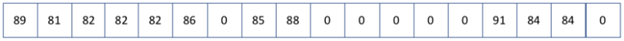

In [ ]:
# Chuyển string thành int list
def convert_to_int_list(lineups):
  int_lineups = []
  _lineups = lineups.split(',')
  for char in _lineups:
    int_lineups.append(int(char))
  
  return int_lineups

In [ ]:
# Lấy các chỉ số đánh giá của các cầu thủ

def extract_ovr_lineup(team_id, lineups, season, teams):
  X = [0] * 18
  i_df = 1
  i_mf = 7
  i_fw = 14
  df = ['RB', 'RCB', 'LCB', 'LB', 'CB', 'RWB', 'LWB', 'SW']
  mf = ['RDM', 'LDM', 'RM', 'LM', 'CAM', 'CM', 'CDM', 'RCM', 'LCM', 'RAM', 'LAM']
  # fw = ['ST', 'RS', 'LS', 'RW', 'LW', 'CF', 'RF', 'LF']                                                                                                                                                                                               

  id_season = str(team_id) + '-' + str(season)
  lineup_int = convert_to_int_list(lineups)
  for number in lineup_int:
    number = int(number)
    if teams[id_season][number]['pos'] == 'GK':
      X[0] = teams[id_season][number]['ovr']
    elif teams[id_season][number]['pos'] in df:
      X[i_df] = teams[id_season][number]['ovr']
      i_df += 1
    elif teams[id_season][number]['pos'] in mf:
      X[i_mf] = teams[id_season][number]['ovr']
      i_mf += 1
    else:
      X[i_fw] = teams[id_season][number]['ovr']
      i_fw += 1
  
  return X

##2.Đặc trưng về độ tuổi trung bình của các cầu thủ

In [ ]:
def get_avg_age(team_id, lineups, season, teams):
  sum_age = 0
  id_season = str(team_id) + '-' + str(season)
  lineup_int = convert_to_int_list(lineups)
  for number in lineup_int:
    sum_age += teams[id_season][number]['age']

  return [round(sum_age / 11, 2)]

##3.Đặc trưng về lịch sử đấu

Kết quả của một trận đấu bóng đá cũng chịu ảnh hưởng không nhỏ đến từ phong độ của 2 đội bóng. Một đội bóng đang có phong độ tốt thì luôn có thể giành kết quả có lợi trước một đội đang có phong độ thấp hơn. Vì vậy các thông số từ lịch sử đấu được thêm vào bên cạnh những chỉ số đánh giá để thể hiện được phong độ của 2 đội. Các thông số này bao gồm số trận thắng, số trận hòa, số bàn thắng và số bàn thua trong **5 trận gần nhất**. Những thông số này thể hiện được rằng khi có tỉ lệ trận thắng cao hay số bàn thắng ghi được nhiều thì hàng công của đội bóng đang thi đấu tốt, ngược lại thì hàng phòng ngự đang thi đấu tệ.

In [ ]:
# Lấy các thông số về lịch sử đấu

def get_history_info(team_id, season, date, team_matches):
  id_season = str(team_id) + '-' + str(season)
  index = 0
  for i in range(len(team_matches[id_season])):
    if team_matches[id_season][i]['date'] == date:
      index = i

  number_win = 0
  number_draw = 0
  number_goals = 0
  number_against_goals = 0
  for j in [index-1, index-2, index-3, index-4, index-5]:
    if j == -1:
      break
    if team_id == team_matches[id_season][j]['home_id']:
      number_goals += team_matches[id_season][j]['home_goals']
      number_against_goals += team_matches[id_season][j]['away_goals']

      if team_matches[id_season][j]['home_goals'] > team_matches[id_season][j]['away_goals']:
        number_win += 1
      elif team_matches[id_season][j]['home_goals'] == team_matches[id_season][j]['away_goals']:
        number_draw += 1

    else:
      number_goals += team_matches[id_season][j]['away_goals']
      number_against_goals += team_matches[id_season][j]['home_goals']

      if team_matches[id_season][j]['away_goals'] > team_matches[id_season][j]['home_goals']:
        number_win += 1
      elif team_matches[id_season][j]['away_goals'] == team_matches[id_season][j]['home_goals']:
        number_draw += 1
    
  X = [number_win, number_draw, number_goals, number_against_goals]
  return X

##4.Tạo input và output cho các model

Input được đưa vào là các mảng có 46 phần tử chia đều cho 2 đội:
- 18 phần tử các chỉ số đánh gía
- 1 phẩn tử độ tuổi trung bình của các cầu thủ
- 5 phần tử gồm các thống kê trong 5 trận đấu gần nhất

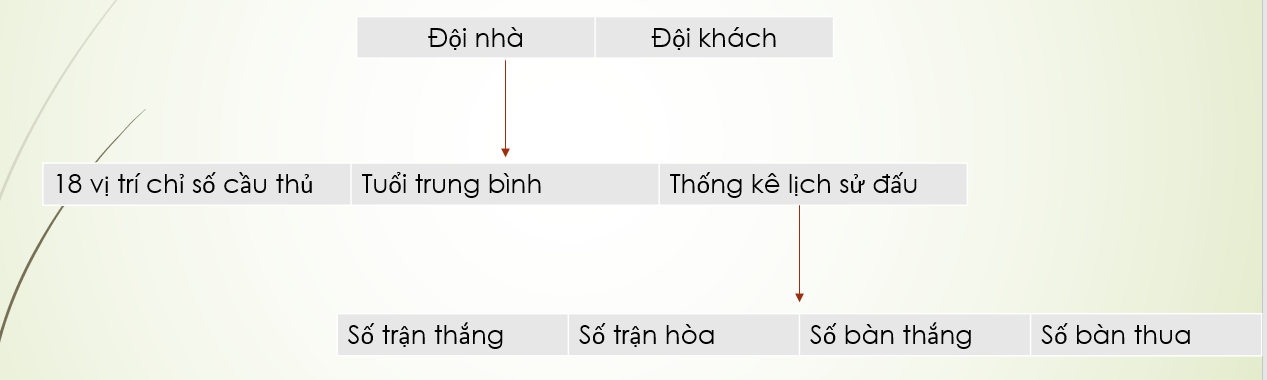

In [ ]:
# Tạo input và ouput

input = []
output = []

for match in matches_data.values:
  flag = 0
  try:
    ovr_home = extract_ovr_lineup(match[7], match[5], match[10], teams=teams)
    ovr_away = extract_ovr_lineup(match[8], match[6], match[10], teams=teams)
  except:
    flag = 1
  
  if flag == 0:
    home_history = get_history_info(match[7], match[10], match[0], team_matches=team_matches)
    away_history = get_history_info(match[8], match[10], match[0], team_matches=team_matches)
    home_avg_age = get_avg_age(match[7], match[5], match[10], teams=teams)
    away_avg_age = get_avg_age(match[8], match[6], match[10], teams=teams)
    input.append(ovr_home + home_avg_age + home_history + ovr_away + away_avg_age + away_history)
    output.append(match[9])

In [ ]:
X  = np.array(input)
y = np.array(output)

print(f"Shape input: {X.shape}")
print(f"Shape output: {y.shape}")

Shape input: (7830, 46)
Shape output: (7830,)


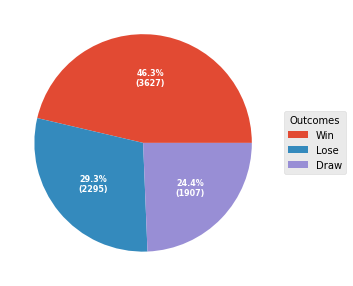

In [ ]:
win = np.unique(y, return_counts=True)[1][2]
draw = np.unique(y, return_counts=True)[1][1]
lose = np.unique(y, return_counts=True)[1][0]

fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))

data = [win, lose, draw]
outcomes = ['Win', 'Lose', 'Draw']


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, outcomes,
          title="Outcomes",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
plt.show()

Dữ liệu có sự cân bằng về số lượng ở 3 nhãn

# **Phân chia dữ liệu**

Dùng dữ liệu các mùa giải từ 2009/2010 - 2018/2019, bao gồm 13.679 trận đấu và 23.869 cầu thủ (cầu thủ), để xây dựng các model. Trong đó 80% dùng để train các thuật toán và 20% để thẩm định kết quả.

Dữ liệu mùa giải 2019/2020, bao gồm 1.366 trận đấu và 2.358 cầu thủ, là bộ dữ liệu các trận đấu mới nhất, để kiểm tra hiệu quả của thuật toán tốt nhất chọn được.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Tuy nhiên trong bộ dữ liệu, các đặc trưng về chỉ số đánh giá cầu thủ có giá trị dao động từ **50 đến 90** trong khi các đặc trưng khác như tỉ lệ trận thắng trong 5 trận gần nhất có giá trị từ **0 -1**. Điều này sẽ làm cho việc đánh giá các đặc trưng bị mất cân bằng và làm cho việc hội tụ của Gradient descent trong một số thuật toán như Neural network, Linear classification,… chậm đi.

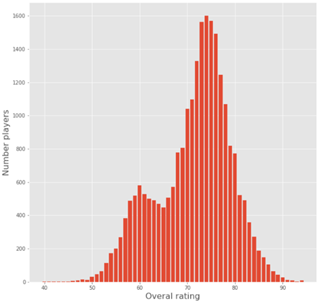

Text(0.5, 1.0, 'Feature magnitude before scaling')

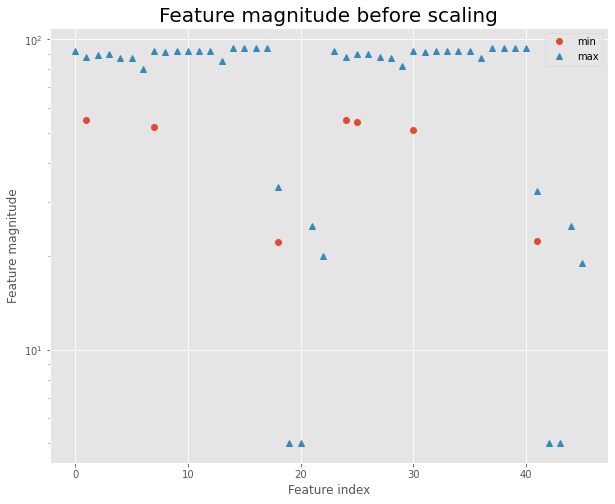

In [ ]:
plt.subplots(figsize=(10,8))
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend()
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")
plt.title("Feature magnitude before scaling", fontsize=20)

Từng đặc trưng trong được chuyển giá trị về dao động từ 0-1:

  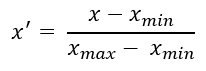

In [ ]:
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Khi áp dụng các thuật toán máy học, sẽ sử dụng cả 2 bộ dữ liệu chưa được scaled và đã đươc scaled 

=> Tìm xem dữ liệu nào sẽ phù hợp cho thuật toán nào và giúp tìm ra cách xử lý dữ liệu phù hợp nhất để đạt kết quả cao nhất cho bài toán.

# **Train model**

Các thuật toán máy học được sử dụng từ thư viện **scikit-learn**.

##K-Nearest-Neighbors

**K-Nearest-Neighbors (k-NN):**
là một thuật toán máy học đơn giản và dễ tiếp cận, nó được xây dựng bằng cách lưu trữ bộ dữ liệu train và thực hiện dự đoán một dữ liệu mới dựa theo k điểm dữ liệu trên tập train gần nó nhất.

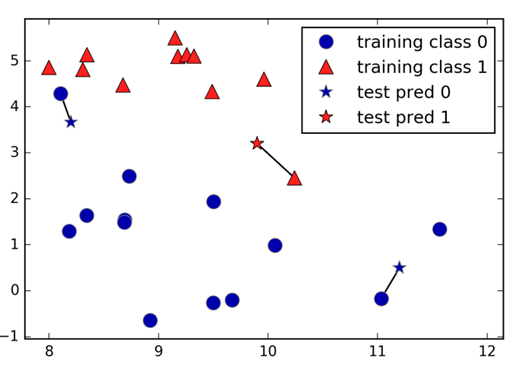

In [ ]:
knn_unscaled = KNeighborsClassifier()
knn_scaled = KNeighborsClassifier()

knn_unscaled.fit(X_train, y_train)
knn_scaled.fit(X_train_scaled, y_train)

y_pred_unscaled = knn_unscaled.predict(X_test)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print('\t\tREPORT ON UNCALED DATA')
print(f"Accuracy on training set: {accuracy_score(y_train, knn_unscaled.predict(X_train))}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_unscaled)}")
print(classification_report(y_test, y_pred_unscaled, target_names=['Lose', 'Draw', 'Win']))

print('\t\tREPORT ON SCALED DATA')
print(f"Accuracy on training set: {accuracy_score(y_train, knn_scaled.predict(X_train_scaled))}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_scaled)}")
print(classification_report(y_test, y_pred_scaled, target_names=['Lose', 'Draw', 'Win']))

		REPORT ON UNCALED DATA
Accuracy on training set: 0.6135057471264368
Accuracy on test set: 0.4425287356321839
              precision    recall  f1-score   support

        Lose       0.40      0.49      0.44       462
        Draw       0.26      0.21      0.23       399
         Win       0.56      0.55      0.55       705

    accuracy                           0.44      1566
   macro avg       0.41      0.41      0.41      1566
weighted avg       0.44      0.44      0.44      1566

		REPORT ON SCALED DATA
Accuracy on training set: 0.6143039591315453
Accuracy on test set: 0.4099616858237548
              precision    recall  f1-score   support

        Lose       0.36      0.42      0.39       462
        Draw       0.28      0.22      0.25       399
         Win       0.50      0.51      0.51       705

    accuracy                           0.41      1566
   macro avg       0.38      0.38      0.38      1566
weighted avg       0.41      0.41      0.41      1566



- f1-score trên dữ liệu không scale cao hơn so với dữ liệu đã được scale : 0.44 so với 0.41.
- Nhãn Draw có hiệu quả dự đoán thấp hơn so với 2 nhãn còn lại.
- Có overfitting trên cả  2 bộ dữ liệu. 


##LOGISTIC REGRESSION

**Logistic Regresion:**
là một model tuyến tính trong machine learning. Các thuật toán tuyến tính thường được sử dụng cho bài toán phân loại 2 lớp. Tuy nhiên để mở rộng cho những bài toán phân loại nhiều lớp hơn, các model tuyến tính sẽ áp dụng cách tiếp cận one-vs.-rest hoặc one-vs.one. Trong đồ án này sử dụng kĩ thuật one-vs.rest.


In [ ]:
lr_1 = LogisticRegression(multi_class='ovr').fit(X_train, y_train)
lr_2 = LogisticRegression(multi_class='ovr').fit(X_train_scaled, y_train)

y_pred_1 = lr_1.predict(X_test)
y_pred_2 = lr_2.predict(X_test_scaled)

print('\t\tREPORT ON UNSCALED DATA')
print(f"Accuracy on training set: {accuracy_score(y_train, lr_1.predict(X_train))}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_1)}")
print(classification_report(y_test, y_pred_1, target_names=['Lose', 'Draw', 'Win']))

print('\t\tREPORT ON SCALED DATA')
print(f"Accuracy on training set: {accuracy_score(y_train, lr_2.predict(X_train_scaled))}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_2)}")
print(classification_report(y_test, y_pred_2, target_names=['Lose', 'Draw', 'Win']))

		REPORT ON UNSCALED DATA
Accuracy on training set: 0.5432630906768838
Accuracy on test set: 0.5178799489144317
              precision    recall  f1-score   support

        Lose       0.49      0.51      0.50       462
        Draw       0.11      0.00      0.00       399
         Win       0.53      0.82      0.65       705

    accuracy                           0.52      1566
   macro avg       0.38      0.44      0.38      1566
weighted avg       0.41      0.52      0.44      1566

		REPORT ON SCALED DATA
Accuracy on training set: 0.5450191570881227
Accuracy on test set: 0.5210727969348659
              precision    recall  f1-score   support

        Lose       0.50      0.50      0.50       462
        Draw       0.12      0.00      0.00       399
         Win       0.53      0.83      0.65       705

    accuracy                           0.52      1566
   macro avg       0.39      0.44      0.38      1566
weighted avg       0.42      0.52      0.44      1566



- f1-score trên 2 bộ dữ liệu bằng nhau. 
- Hiệu quả khi dự đoán nhãn Draw thấp hơn so với 2 nhãn còn lại.


##SUPPORT VECTOR MACHINES (SVMs)

**SVMs:** là một model mở rộng từ những model tuyến tính như Logistic Regression hay LinearSVC. Nó phù hợp với những bộ dữ liệu phức tạp, phi tuyến tính. SVMs thêm vào những đặc trưng mới đồng thời cũng làm tăng không gian của bộ dữ liệu, từ đó đưa ra những ranh giới giữa các điểm dữ liệu gọi là các vector. Những vector này là cơ sở để đưa ra dự đoán những dữ liệu mới.

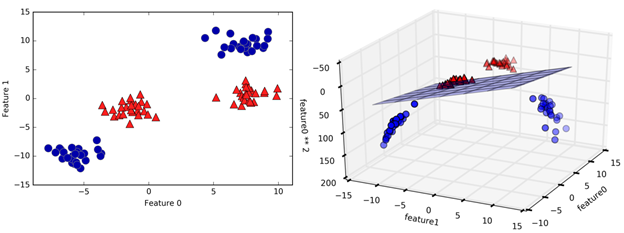

In [ ]:
svm_1 = SVC().fit(X_train, y_train)
svm_2 = SVC().fit(X_train_scaled, y_train)

y_pred_1 = svm_1.predict(X_test)
y_pred_2 = svm_2.predict(X_test_scaled)

print('\t\tREPORT ON UNSCALED DATA')
print(f"Accuracy on training set: {accuracy_score(y_train, svm_1.predict(X_train))}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_1)}")
print(classification_report(y_test, y_pred_1, target_names=['Lose', 'Draw', 'Win']))

print('\t\tREPORT ON SCALED DATA')
print(f"Accuracy on training set: {accuracy_score(y_train, svm_2.predict(X_train_scaled))}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_2)}")
print(classification_report(y_test, y_pred_2, target_names=['Lose', 'Draw', 'Win']))

		REPORT ON UNSCALED DATA
Accuracy on training set: 0.54757343550447
Accuracy on test set: 0.5191570881226054
              precision    recall  f1-score   support

        Lose       0.54      0.40      0.46       462
        Draw       0.00      0.00      0.00       399
         Win       0.51      0.89      0.65       705

    accuracy                           0.52      1566
   macro avg       0.35      0.43      0.37      1566
weighted avg       0.39      0.52      0.43      1566

		REPORT ON SCALED DATA
Accuracy on training set: 0.5555555555555556
Accuracy on test set: 0.5178799489144317
              precision    recall  f1-score   support

        Lose       0.52      0.41      0.46       462
        Draw       0.00      0.00      0.00       399
         Win       0.52      0.88      0.65       705

    accuracy                           0.52      1566
   macro avg       0.35      0.43      0.37      1566
weighted avg       0.39      0.52      0.43      1566



- f1-score trên 2 bộ dữ liệu bằng nhau. 
- Trong trường hợp này, SVMs không thể dự đoán đúng bất kì nhãn Draw nào.


##NEURAL NETWORK (MLPs)

**MLPs:** model có thể được xem gần giống như một model tuyến tính vì nó sử dụng kết quả từ nhiều lớp liên tiếp nhau để đưa ra dự đoán. Mỗi lớp này chứa nhiều node và trọng số của mỗi lớp sẽ được đưa vào những hàm phi tuyến tính như hàm relu, tanh. Kết quả của những hàm này sẽ được đưa vào các node ở những lớp sau.

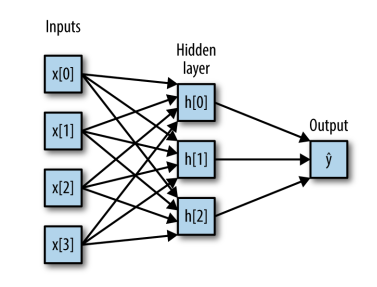

In [ ]:
mlp_1 = MLPClassifier().fit(X_train, y_train)
mlp_2 = MLPClassifier().fit(X_train_scaled, y_train)

y_pred_1 = mlp_1.predict(X_test)
y_pred_2 = mlp_2.predict(X_test_scaled)

print('\t\tREPORT ON UNCALED DATA')
print(f"Accuracy on training set: {accuracy_score(y_train, mlp_1.predict(X_train))}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_1)}")
print(classification_report(y_test, y_pred_1, target_names=['Lose', 'Draw', 'Win']))

print('\t\tREPORT ON SCALED DATA')
print(f"Accuracy on training set: {accuracy_score(y_train, mlp_2.predict(X_train_scaled))}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_2)}")
print(classification_report(y_test, y_pred_2, target_names=['Lose', 'Draw', 'Win']))

		REPORT ON UNCALED DATA
Accuracy on training set: 0.5292145593869731
Accuracy on test set: 0.4661558109833972
              precision    recall  f1-score   support

        Lose       0.45      0.38      0.41       462
        Draw       0.30      0.36      0.32       399
         Win       0.59      0.59      0.59       705

    accuracy                           0.47      1566
   macro avg       0.45      0.44      0.44      1566
weighted avg       0.47      0.47      0.47      1566

		REPORT ON SCALED DATA
Accuracy on training set: 0.5775862068965517
Accuracy on test set: 0.5063856960408685
              precision    recall  f1-score   support

        Lose       0.54      0.34      0.41       462
        Draw       0.29      0.07      0.12       399
         Win       0.52      0.86      0.65       705

    accuracy                           0.51      1566
   macro avg       0.45      0.42      0.39      1566
weighted avg       0.46      0.51      0.44      1566



- f1-score trên dữ liệu scale cao hơn so với dữ liệu không được scale : 0.51 so với 0.47.
- Hiệu quả dữ đoán của nhãn Draw cao hơn so với các model trước

##Đánh giá

Nhìn chung, trên tất cả các model và trên cả 2 dạng dữ liệu scale và không scale, kết quả dự đoán gần giống nhau, trong đó Logistic Regression, SVMs có hiệu quả cao nhất trên tập test (f1-score = 0.52). Nhãn Draw có hiệu quả dự đoán thấp trong tất cả các model.

#**Thử các tham số**

##1. K-Nearest-Neighbors

In [ ]:
training_accuracy_1 = []
training_accuracy_2 = []
test_accuracy_1 = []
test_accuracy_2 = []


neighbors_settings = range(1, 80, 2)

for n_neighbors in neighbors_settings:
  knn_1 = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn_2 = KNeighborsClassifier(n_neighbors=n_neighbors)

  knn_1.fit(X_train, y_train)
  knn_2.fit(X_train_scaled, y_train)

  # record
  training_accuracy_1.append(knn_1.score(X_train, y_train))
  test_accuracy_1.append(knn_1.score(X_test, y_test))

  training_accuracy_2.append(knn_2.score(X_train_scaled, y_train))
  test_accuracy_2.append(knn_2.score(X_test_scaled, y_test))

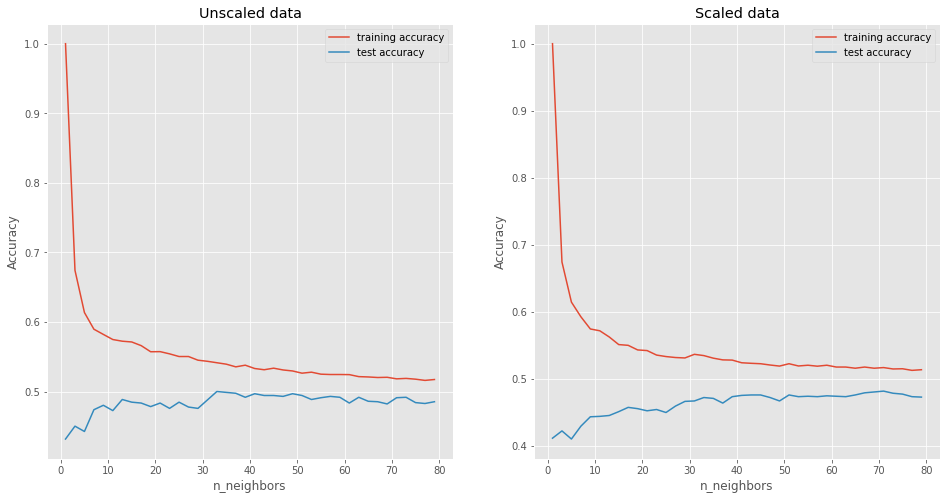

In [ ]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16,8))
# Unscale data
ax1.plot(neighbors_settings, training_accuracy_1, label="training accuracy")
ax1.plot(neighbors_settings, test_accuracy_1, label="test accuracy")
ax1.set_title("Unscaled data")
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("n_neighbors")
ax1.legend()

# Scale data
ax2.plot(neighbors_settings, training_accuracy_2, label="training accuracy")
ax2.plot(neighbors_settings, test_accuracy_2, label="test accuracy")
ax2.set_title("Scaled data")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("n_neighbors")
ax2.legend()

In [ ]:
#List Hyperparameters that needed to tune.
n_neighbors = range(30, 100, 2)
metric = ['euclidean', 'manhattan']

knn_1 = KNeighborsClassifier()
knn_2 = KNeighborsClassifier()
grid = dict(n_neighbors=n_neighbors, metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_1 = GridSearchCV(estimator=knn_1, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_search_2 = GridSearchCV(estimator=knn_2, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

grid_result_1 = grid_search_1.fit(X_train, y_train)
grid_result_2 = grid_search_2.fit(X_train_scaled, y_train)

print("Best uncaled model:")
print("Best performance: %f using %s" % (grid_result_1.best_score_, grid_result_1.best_params_))

print("Best scaled model:")
print("Best performance: %f using %s" % (grid_result_2.best_score_, grid_result_2.best_params_))

Best uncaled model:
Best performance: 0.521763 using {'metric': 'manhattan', 'n_neighbors': 96}
Best scaled model:
Best performance: 0.519741 using {'metric': 'manhattan', 'n_neighbors': 76}


In [ ]:
# Best KNN model
best_knn_1 = KNeighborsClassifier(metric='manhattan', n_neighbors=96)
best_knn_2 = KNeighborsClassifier(metric='manhattan', n_neighbors=76)

best_knn_1.fit(X_train, y_train)
best_knn_2.fit(X_train_scaled, y_train)

y_pred_1 = best_knn_1.predict(X_test)
y_pred_2 = best_knn_2.predict(X_test_scaled)

print('\t\tREPORT ON UNCALED DATA')
print(f"Accuracy on training set: {accuracy_score(y_train, best_knn_1.predict(X_train))}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_1)}")
print(classification_report(y_test, y_pred_1, target_names=['Lose', 'Draw', 'Win']))

print('\t\tREPORT ON SCALED DATA')
print(f"Accuracy on training set: {accuracy_score(y_train, best_knn_2.predict(X_train_scaled))}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_2)}")
print(classification_report(y_test, y_pred_2, target_names=['Lose', 'Draw', 'Win']))

		REPORT ON UNCALED DATA
Accuracy on training set: 0.5292145593869731
Accuracy on test set: 0.49936143039591313
              precision    recall  f1-score   support

        Lose       0.52      0.29      0.38       462
        Draw       0.44      0.02      0.03       399
         Win       0.50      0.91      0.64       705

    accuracy                           0.50      1566
   macro avg       0.49      0.41      0.35      1566
weighted avg       0.49      0.50      0.41      1566

		REPORT ON SCALED DATA
Accuracy on training set: 0.5348020434227331
Accuracy on test set: 0.5038314176245211
              precision    recall  f1-score   support

        Lose       0.54      0.32      0.40       462
        Draw       0.29      0.01      0.02       399
         Win       0.50      0.90      0.64       705

    accuracy                           0.50      1566
   macro avg       0.44      0.41      0.36      1566
weighted avg       0.46      0.50      0.41      1566



Text(0.5, 1.0, 'Confustion matrix on Scaled data')

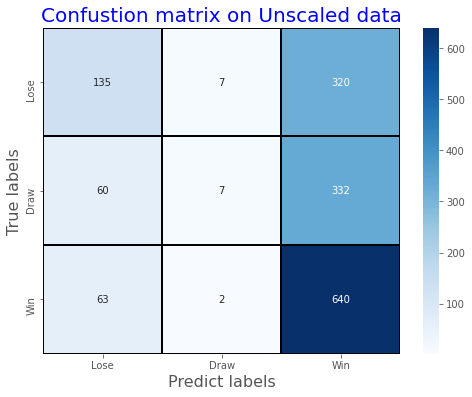

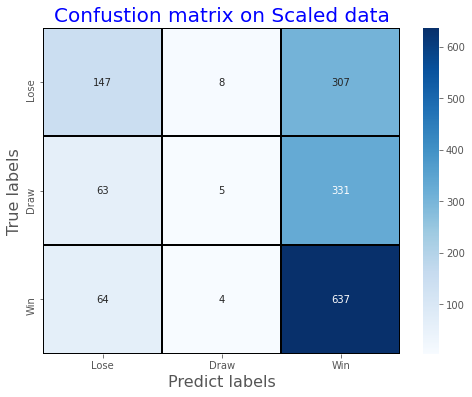

In [ ]:
matrix_1 = confusion_matrix(y_test, y_pred_1)
matrix_2 = confusion_matrix(y_test, y_pred_2)

confuse_matrix_1 = pd.DataFrame(matrix_1, index = ['Lose', 'Draw' , 'Win'], columns = ['Lose','Draw', 'Win'])
confuse_matrix_2 = pd.DataFrame(matrix_2, index = ['Lose', 'Draw' , 'Win'], columns = ['Lose','Draw', 'Win'])

# Unscaled data
plt.figure(1, figsize = (8,6))
sns.heatmap(confuse_matrix_1, cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Lose', 'Draw' , 'Win'] , yticklabels = ['Lose', 'Draw' , 'Win'])
plt.xlabel('Predict labels', fontsize=16)
plt.ylabel('True labels', fontsize=16)
plt.title('Confustion matrix on Unscaled data', fontsize=20, c='blue')

# Scaled data
plt.figure(2, figsize = (8,6))
sns.heatmap(confuse_matrix_2, cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Lose', 'Draw' , 'Win'] , yticklabels = ['Lose', 'Draw' , 'Win'])
plt.xlabel('Predict labels', fontsize=16)
plt.ylabel('True labels', fontsize=16)
plt.title('Confustion matrix on Scaled data', fontsize=20, c='blue')

Hiệu quả dự đoán đã được tăng, model có f1-score bằng nhau trên cả 2 bộ dữ liệu. 

Tuy nhiên đối với nhãn Draw, dù precision có cao hơn nhưng recall và f1-score lại có kết quả thấp hơn so với model mặc định.

##2.LOGISTIC REGRESSION

In [ ]:
training_accuracy_1 = []
training_accuracy_2 = []
test_accuracy_1 = []
test_accuracy_2 = []

C = np.arange(0.001, 1010.001, 10)

for C_ in C:
  lr_1 = LogisticRegression(multi_class='ovr').fit(X_train, y_train)
  lr_2 = LogisticRegression(multi_class='ovr').fit(X_train_scaled, y_train)

  # Record
  training_accuracy_1.append(lr_1.score(X_train, y_train))
  test_accuracy_1.append(lr_1.score(X_test, y_test))

  training_accuracy_2.append(lr_2.score(X_train_scaled, y_train))
  test_accuracy_2.append(lr_2.score(X_test_scaled, y_test))

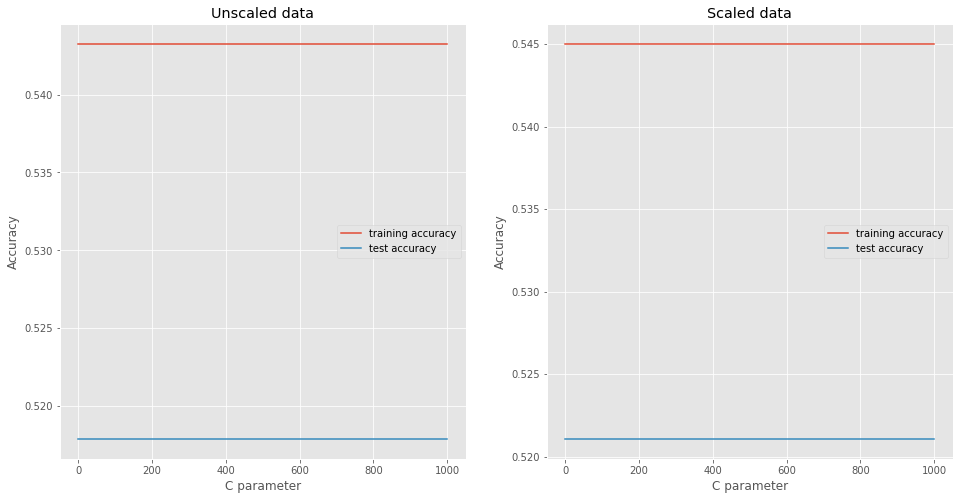

In [ ]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16,8))

# Unscale data
ax1.plot(C, training_accuracy_1, label="training accuracy")
ax1.plot(C, test_accuracy_1, label="test accuracy")
ax1.set_title("Unscaled data")
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("C parameter")
ax1.legend()

# Scale data
ax2.plot(C, training_accuracy_2, label="training accuracy")
ax2.plot(C, test_accuracy_2, label="test accuracy")
ax2.set_title("Scaled data")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("C parameter")
ax2.legend()

In [ ]:
C = [0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2', 'elasticnet']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

lr_1 = LogisticRegression().fit(X_train, y_train)
lr_2 = LogisticRegression().fit(X_train_scaled, y_train)

grid = dict(C=C, penalty=penalty, solver=solver)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_1 = GridSearchCV(estimator=lr_1, param_grid=grid, n_jobs=-1, cv=cv)
grid_search_2 = GridSearchCV(estimator=lr_2, param_grid=grid, n_jobs=-1, cv=cv)

grid_result_1 = grid_search_1.fit(X_train, y_train)
grid_result_2 = grid_search_2.fit(X_train_scaled, y_train)

print('\t\tREPORT ON UNSCALED DATA')
print(f"Accuracy on training set: {accuracy_score(y_train, lr_1.predict(X_train))}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_1)}")
print(classification_report(y_test, y_pred_1, target_names=['Lose', 'Draw', 'Win']))

print('\t\tREPORT ON SCALED DATA')
print(f"Accuracy on training set: {accuracy_score(y_train, lr_2.predict(X_train_scaled))}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_2)}")
print(classification_report(y_test, y_pred_2, target_names=['Lose', 'Draw', 'Win']))

Best uncaled model:
Best performance: 0.536927 using {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best scaled model:
Best performance: 0.537514 using {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Best KNN model
best_lr_1 = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
best_lr_2 = LogisticRegression(C=1, penalty='l2', solver='liblinear')

best_lr_1.fit(X_train, y_train)
best_lr_2.fit(X_train_scaled, y_train)

y_pred_1 = best_lr_1.predict(X_test)
y_pred_2 = best_lr_2.predict(X_test_scaled)

print('\t\tREPORT ON UNSCALED DATA')
print(f"Accuracy on training set: {accuracy_score(y_train, best_lr_1.predict(X_train))}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_1)}")
print(classification_report(y_test, y_pred_1, target_names=['Lose', 'Draw', 'Win']))

print('\t\tREPORT ON SCALED DATA')
print(f"Accuracy on training set: {accuracy_score(y_train, best_lr_2.predict(X_train_scaled))}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_2)}")
print(classification_report(y_test, y_pred_2, target_names=['Lose', 'Draw', 'Win']))

		REPORT ON UNSCALED DATA
Accuracy on training set: 0.544220945083014
Accuracy on test set: 0.5197956577266922
              precision    recall  f1-score   support

        Lose       0.49      0.51      0.50       462
        Draw       0.17      0.00      0.00       399
         Win       0.54      0.82      0.65       705

    accuracy                           0.52      1566
   macro avg       0.40      0.44      0.38      1566
weighted avg       0.43      0.52      0.44      1566

		REPORT ON SCALED DATA
Accuracy on training set: 0.5451787994891443
Accuracy on test set: 0.5217113665389528
              precision    recall  f1-score   support

        Lose       0.50      0.50      0.50       462
        Draw       0.14      0.00      0.00       399
         Win       0.53      0.83      0.65       705

    accuracy                           0.52      1566
   macro avg       0.39      0.44      0.38      1566
weighted avg       0.42      0.52      0.44      1566



Text(0.5, 1.0, 'Confustion matrix on Scaled data')

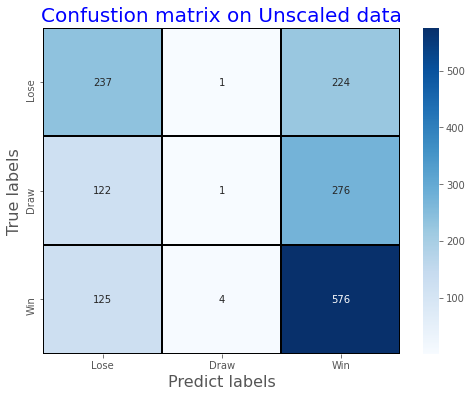

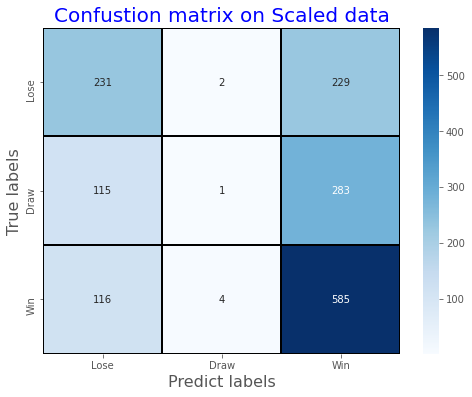

In [ ]:
matrix_1 = confusion_matrix(y_test, y_pred_1)
matrix_2 = confusion_matrix(y_test, y_pred_2)

confuse_matrix_1 = pd.DataFrame(matrix_1, index = ['Lose', 'Draw' , 'Win'], columns = ['Lose','Draw', 'Win'])
confuse_matrix_2 = pd.DataFrame(matrix_2, index = ['Lose', 'Draw' , 'Win'], columns = ['Lose','Draw', 'Win'])

# Unscaled data
plt.figure(1, figsize = (8,6))
sns.heatmap(confuse_matrix_1, cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Lose', 'Draw' , 'Win'] , yticklabels = ['Lose', 'Draw' , 'Win'])
plt.xlabel('Predict labels', fontsize=16)
plt.ylabel('True labels', fontsize=16)
plt.title('Confustion matrix on Unscaled data', fontsize=20, c='blue')

# Scaled data
plt.figure(2, figsize = (8,6))
sns.heatmap(confuse_matrix_2, cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Lose', 'Draw' , 'Win'] , yticklabels = ['Lose', 'Draw' , 'Win'])
plt.xlabel('Predict labels', fontsize=16)
plt.ylabel('True labels', fontsize=16)
plt.title('Confustion matrix on Scaled data', fontsize=20, c='blue')

Hiệu quả không có nhiều thay đổi so với model mặc định.

##3.SUPPORT VECTOR MACHINES

In [ ]:
training_accuracy_1 = []
training_accuracy_2 = []
test_accuracy_1 = []
test_accuracy_2 = []

C = np.arange(0.001, 50, 1)
# C = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

for C_ in C:
  svm_1 = SVC(C=C_).fit(X_train, y_train)
  svm_2 = SVC(C=C_).fit(X_train_scaled, y_train)

  training_accuracy_1.append(svm_1.score(X_train, y_train))
  test_accuracy_1.append(svm_1.score(X_test, y_test))

  training_accuracy_2.append(svm_2.score(X_train_scaled, y_train))
  test_accuracy_2.append(svm_2.score(X_test_scaled, y_test))

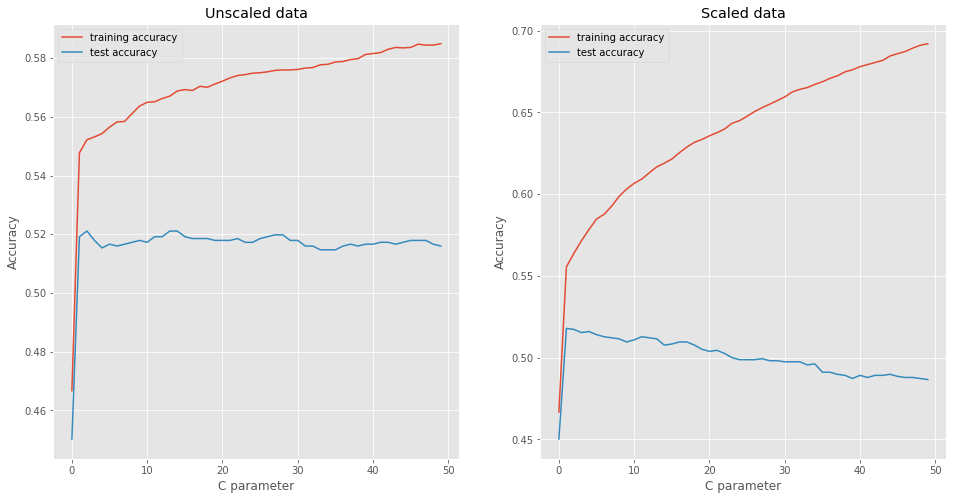

In [ ]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16,8))

# Unscale data
ax1.plot(C, training_accuracy_1, label="training accuracy")
ax1.plot(C, test_accuracy_1, label="test accuracy")
ax1.set_title("Unscaled data")
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("C parameter")
ax1.legend()

# Scale data
ax2.plot(C, training_accuracy_2, label="training accuracy")
ax2.plot(C, test_accuracy_2, label="test accuracy")
ax2.set_title("Scaled data")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("C parameter")
ax2.legend()

In [ ]:
svm_1 = SVC()
svm_2 = SVC()

C = np.arange(0.025, 1, 0.025)
kernel = ['poly', 'rbf', 'sigmoid']
gamma = ['scale']

grid = dict(C=C, kernel=kernel, gamma=gamma)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_1 = GridSearchCV(estimator=svm_1, param_grid=grid, cv=3)
grid_search_2 = GridSearchCV(estimator=svm_2, param_grid=grid, cv=3)
grid_result_1 = grid_search_1.fit(X_train, y_train)
grid_result_2 = grid_search_2.fit(X_train_scaled, y_train)


print("Best uncaled model:")
print("Best performance: %f using %s" % (grid_result_1.best_score_, grid_result_1.best_params_))

print("Best scaled model:")
print("Best performance: %f using %s" % (grid_result_2.best_score_, grid_result_2.best_params_))

Best uncaled model:
Best performance: 0.539911 using {'C': 0.42500000000000004, 'gamma': 'scale', 'kernel': 'poly'}
Best scaled model:
Best performance: 0.535121 using {'C': 0.15, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
# Best model
best_svm_1 = SVC(C=0.42500000000000004, gamma='scale', kernel='poly').fit(X_train, y_train)
best_svm_2 = SVC(C=0.15, gamma='scale', kernel='poly').fit(X_train_scaled, y_train)

y_pred_1 = best_svm_1.predict(X_test)
y_pred_2 = best_svm_2.predict(X_test_scaled)

print('\t\tREPORT ON UNSCALED DATA')
print(f"Accuracy on training set: {accuracy_score(y_train, best_svm_1.predict(X_train))}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_1)}")
print(classification_report(y_test, y_pred_1, target_names=['Lose', 'Draw', 'Win']))

print('\t\tREPORT ON SCALED DATA')
print(f"Accuracy on training set: {accuracy_score(y_train, best_svm_2.predict(X_train_scaled))}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_2)}")
print(classification_report(y_test, y_pred_2, target_names=['Lose', 'Draw', 'Win']))

		REPORT ON UNSCALED DATA
Accuracy on training set: 0.5501277139208174
Accuracy on test set: 0.5217113665389528
              precision    recall  f1-score   support

        Lose       0.53      0.42      0.47       462
        Draw       0.00      0.00      0.00       399
         Win       0.52      0.88      0.65       705

    accuracy                           0.52      1566
   macro avg       0.35      0.43      0.37      1566
weighted avg       0.39      0.52      0.43      1566

		REPORT ON SCALED DATA
Accuracy on training set: 0.5522030651340997
Accuracy on test set: 0.5217113665389528
              precision    recall  f1-score   support

        Lose       0.53      0.42      0.47       462
        Draw       0.00      0.00      0.00       399
         Win       0.52      0.89      0.65       705

    accuracy                           0.52      1566
   macro avg       0.35      0.43      0.37      1566
weighted avg       0.39      0.52      0.43      1566



Text(0.5, 1.0, 'Confustion matrix on Scaled data')

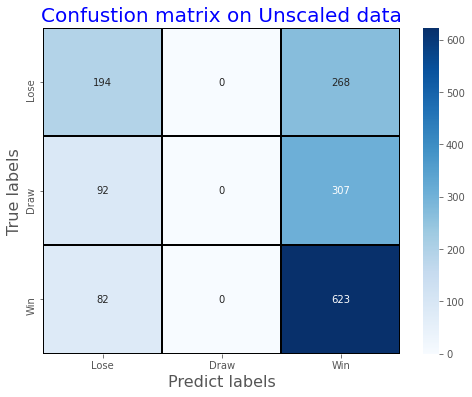

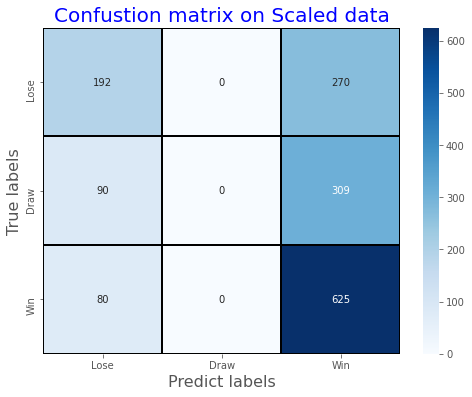

In [ ]:
matrix_1 = confusion_matrix(y_test, y_pred_1)
matrix_2 = confusion_matrix(y_test, y_pred_2)

confuse_matrix_1 = pd.DataFrame(matrix_1, index = ['Lose', 'Draw' , 'Win'], columns = ['Lose','Draw', 'Win'])
confuse_matrix_2 = pd.DataFrame(matrix_2, index = ['Lose', 'Draw' , 'Win'], columns = ['Lose','Draw', 'Win'])

# Unscaled data
plt.figure(1, figsize = (8,6))
sns.heatmap(confuse_matrix_1, cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Lose', 'Draw' , 'Win'] , yticklabels = ['Lose', 'Draw' , 'Win'])
plt.xlabel('Predict labels', fontsize=16)
plt.ylabel('True labels', fontsize=16)
plt.title('Confustion matrix on Unscaled data', fontsize=20, c='blue')

# Scaled data
plt.figure(2, figsize = (8,6))
sns.heatmap(confuse_matrix_2, cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Lose', 'Draw' , 'Win'] , yticklabels = ['Lose', 'Draw' , 'Win'])
plt.xlabel('Predict labels', fontsize=16)
plt.ylabel('True labels', fontsize=16)
plt.title('Confustion matrix on Scaled data', fontsize=20, c='blue')

Kết quả không có nhiều thay đổi so với model mặc định.

##4.NEURAL NETWORK

In [ ]:
hidden_layer_sizes = [(50, 10), (100, 50, 10), (150,100,50)]
solver = ['lbfgs', 'sgd', 'adam']
activation = ['identity', 'logistic', 'tanh', 'relu']
alpha = [0.001, 0.01, 0.1, 1, 10, 100]

mlp_1 = MLPClassifier(random_state=0).fit(X_train, y_train)
mlp_2 = MLPClassifier(random_state=0).fit(X_train_scaled, y_train)

grid = dict(hidden_layer_sizes=hidden_layer_sizes, solver=solver, activation=activation, alpha=alpha)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_1 = GridSearchCV(estimator=mlp_1, param_grid=grid, n_jobs=-1, cv=3)
grid_search_2 = GridSearchCV(estimator=mlp_2, param_grid=grid, n_jobs=-1, cv=3)

grid_result_1 = grid_search_1.fit(X_train, y_train)
grid_result_2 = grid_search_2.fit(X_train_scaled, y_train)

print("Best uncaled model:")
print("Best performance: %f using %s" % (grid_result_1.best_score_, grid_result_1.best_params_))

print("Best scaled model:")
print("Best performance: %f using %s" % (grid_result_2.best_score_, grid_result_2.best_params_))

Best uncaled model:
Best performance: 0.539112 using {'activation': 'relu', 'alpha': 10, 'hidden_layer_sizes': (100, 50, 10), 'solver': 'lbfgs'}
Best scaled model:
Best performance: 0.538633 using {'activation': 'identity', 'alpha': 10, 'hidden_layer_sizes': (100, 50, 10), 'solver': 'lbfgs'}


In [ ]:
# Best KNN model
best_mlp_1 = MLPClassifier(activation='relu', alpha=10, hidden_layer_sizes=(100,50, 10), solver='lbfgs')
best_mlp_2 = MLPClassifier(activation='identity', alpha=10, hidden_layer_sizes=(100, 50, 10), solver='lbfgs')

best_mlp_1.fit(X_train, y_train)
best_mlp_2.fit(X_train_scaled, y_train)

y_pred_1 = best_mlp_1.predict(X_test)
y_pred_2 = best_mlp_2.predict(X_test_scaled)

print('\t\tREPORT ON UNSCALED DATA')
print(f"Accuracy on training set: {accuracy_score(y_train, best_mlp_1.predict(X_train))}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_1)}")
print(classification_report(y_test, y_pred_1, target_names=['Lose', 'Draw', 'Win']))

print('\t\tREPORT ON SCALED DATA')
print(f"Accuracy on training set: {accuracy_score(y_train, best_mlp_2.predict(X_train_scaled))}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_2)}")
print(classification_report(y_test, y_pred_2, target_names=['Lose', 'Draw', 'Win']))

		REPORT ON UNSCALED DATA
Accuracy on training set: 0.41522988505747127
Accuracy on test set: 0.4003831417624521
              precision    recall  f1-score   support

        Lose       0.31      0.31      0.31       462
        Draw       0.00      0.00      0.00       399
         Win       0.44      0.68      0.54       705

    accuracy                           0.40      1566
   macro avg       0.25      0.33      0.28      1566
weighted avg       0.29      0.40      0.33      1566

		REPORT ON SCALED DATA
Accuracy on training set: 0.5429438058748404
Accuracy on test set: 0.5274584929757343
              precision    recall  f1-score   support

        Lose       0.50      0.52      0.51       462
        Draw       0.00      0.00      0.00       399
         Win       0.54      0.83      0.66       705

    accuracy                           0.53      1566
   macro avg       0.35      0.45      0.39      1566
weighted avg       0.39      0.53      0.44      1566



Text(0.5, 1.0, 'Confustion matrix on Scaled data')

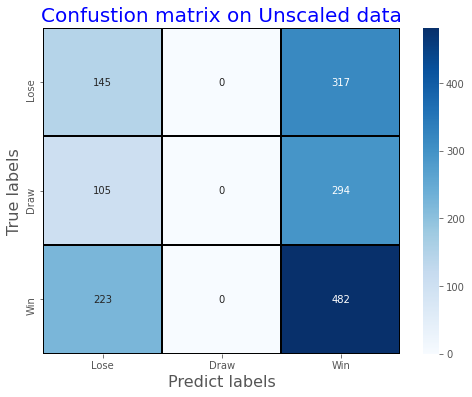

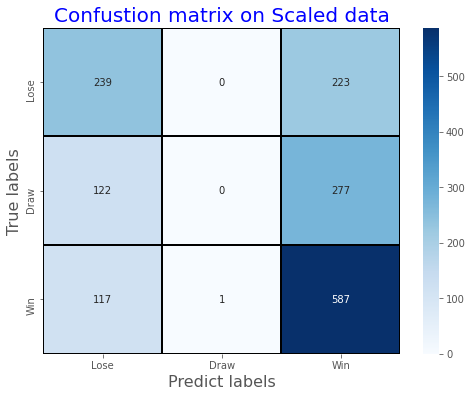

In [ ]:
matrix_1 = confusion_matrix(y_test, y_pred_1)
matrix_2 = confusion_matrix(y_test, y_pred_2)

confuse_matrix_1 = pd.DataFrame(matrix_1, index = ['Lose', 'Draw' , 'Win'], columns = ['Lose','Draw', 'Win'])
confuse_matrix_2 = pd.DataFrame(matrix_2, index = ['Lose', 'Draw' , 'Win'], columns = ['Lose','Draw', 'Win'])

# Unscaled data
plt.figure(1, figsize = (8,6))
sns.heatmap(confuse_matrix_1, cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Lose', 'Draw' , 'Win'] , yticklabels = ['Lose', 'Draw' , 'Win'])
plt.xlabel('Predict labels', fontsize=16)
plt.ylabel('True labels', fontsize=16)
plt.title('Confustion matrix on Unscaled data', fontsize=20, c='blue')

# Scaled data
plt.figure(2, figsize = (8,6))
sns.heatmap(confuse_matrix_2, cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Lose', 'Draw' , 'Win'] , yticklabels = ['Lose', 'Draw' , 'Win'])
plt.xlabel('Predict labels', fontsize=16)
plt.ylabel('True labels', fontsize=16)
plt.title('Confustion matrix on Scaled data', fontsize=20, c='blue')

Hiệu quả trên bộ dữ liệu scale tăng, nhưng vẫn không có hiệu quả đối với nhãn Draw.

#**Đánh giá**

In [ ]:
final_model = MLPClassifier(activation='identity', alpha=10, hidden_layer_sizes=[100,50,10], solver='lbfgs').fit(X_train_scaled, y_train)

Sau khi xây dựng và kiểm thử với 4 thuật toán (K Nearest-Neighbors, Logistic Regresion, Support Vector Machines, Neural Network) thuật toán có hiệu quả tốt nhất là **Neural Network**. Mặc dù Logistic Regresion và Support Vecotr Machines cũng cho kết quả tương tự nhưng Logistic Regresion phù hợp hơn với bài toán phân loại 2 lớp còn Support Vector Machine có thời gian train và tune các tham số lớn.

Bộ dữ liệu cho đã được scale về trong khoảng 0 -1 sẽ giúp Neural Network hoạt động tốt hơn đối với bài toán này.

f1-score trên tập test là 0.53.


#**Dự đoán trên bộ dữ liệu mới**

##1.Load data

In [ ]:
players_new = pd.read_csv('/content/CS114.K21.KHTN/Project/Data/players_20.csv')
players_new.head()

,name,team,position,rating,number,age,season
0,peter-gulacsi-fifa-20,rb-leipzig,GK,85,1,30,fifa20
1,nordi-mukiele-fifa-20,rb-leipzig,RWB,78,22,22,fifa20
2,lukas-klostermann-fifa-20,rb-leipzig,RCB,81,16,24,fifa20
3,dayot-upamecano-fifa-20,rb-leipzig,CB,80,5,21,fifa20
4,marcel-halstenberg-fifa-20,rb-leipzig,LCB,81,23,28,fifa20


In [ ]:
players_new = players_new.dropna()
players_new = players_new.drop_duplicates()
players_new

,name,team,position,rating,number,age,season
0,peter-gulacsi-fifa-20,rb-leipzig,GK,85,1,30,fifa20
1,nordi-mukiele-fifa-20,rb-leipzig,RWB,78,22,22,fifa20
2,lukas-klostermann-fifa-20,rb-leipzig,RCB,81,16,24,fifa20
3,dayot-upamecano-fifa-20,rb-leipzig,CB,80,5,21,fifa20
4,marcel-halstenberg-fifa-20,rb-leipzig,LCB,81,23,28,fifa20
...,...,...,...,...,...,...,...
2353,lee-grant-fifa-20,manchester-united,GK,71,13,37,fifa20
2354,james-garner-fifa-20,manchester-united,CDM,66,37,19,fifa20
2355,ethan-galbraith-fifa-20,manchester-united,CDM,63,54,19,fifa20
2356,ethan-laird-fifa-20,manchester-united,RB,65,41,18,fifa20


In [ ]:
matches_new = pd.read_csv('/content/CS114.K21.KHTN/Project/Data/lineups_20.csv')
matches_new.head()

,date,home_team,away_team,home_goals,away_goals,home_lineups,away_lineups
0,14th July 2020,chelsea,norwich-city,1,0,"1,28,2,15,3,12,5,17,10,18,22","1,2,4,15,12,27,14,7,23,11,20"
1,23rd May 2020,sc-freiburg,werder-bremen,0,1,"1,7,25,5,30,22,19,27,32,9,18","1,23,13,18,32,35,3,30,10,19,7"
2,25th November 2019,lecce,cagliari,2,2,"21,29,5,13,27,4,77,23,11,9,19","90,12,19,15,22,18,8,6,4,10,99"
3,24th August 2019,norwich-city,chelsea,2,3,"1,2,5,4,12,10,19,17,18,14,22","1,28,4,15,33,17,5,8,22,9,19"
4,1st July 2020,real-betis,villarreal,0,2,"1,23,5,12,22,10,21,6,8,18,9","1,20,3,4,18,23,14,19,24,7,9"


In [ ]:
matches_new = matches_new.dropna()
matches_new = matches_new.drop_duplicates()
matches_new

,date,home_team,away_team,home_goals,away_goals,home_lineups,away_lineups
0,14th July 2020,chelsea,norwich-city,1,0,"1,28,2,15,3,12,5,17,10,18,22","1,2,4,15,12,27,14,7,23,11,20"
1,23rd May 2020,sc-freiburg,werder-bremen,0,1,"1,7,25,5,30,22,19,27,32,9,18","1,23,13,18,32,35,3,30,10,19,7"
2,25th November 2019,lecce,cagliari,2,2,"21,29,5,13,27,4,77,23,11,9,19","90,12,19,15,22,18,8,6,4,10,99"
3,24th August 2019,norwich-city,chelsea,2,3,"1,2,5,4,12,10,19,17,18,14,22","1,28,4,15,33,17,5,8,22,9,19"
4,1st July 2020,real-betis,villarreal,0,2,"1,23,5,12,22,10,21,6,8,18,9","1,20,3,4,18,23,14,19,24,7,9"
...,...,...,...,...,...,...,...
1361,2nd November 2019,aston-villa,liverpool,1,2,"1,24,22,40,18,7,11,6,21,9,17","1,66,6,4,26,14,20,5,11,9,10"
1362,5th December 2019,arsenal,brighton-and-hove-albion,1,2,"1,2,5,23,31,34,11,14,28,10,9","1,46,15,5,33,6,24,18,13,7,44"
1363,7th March 2020,crystal-palace,watford,1,0,"31,2,6,24,3,8,22,18,9,17,11","26,21,27,15,11,19,29,23,16,37,9"
1364,6th July 2020,tottenham-hotspur,everton,1,0,"1,24,4,15,33,17,8,18,27,10,7","1,23,5,2,12,26,10,21,17,7,9"


##2.Tiền xử lí dữ liệu

In [ ]:
player_teams_20 = players_new.team.unique()
print(f"Number teams in player_data: {len(player_teams_20)}")

Number teams in player_data: 78


In [ ]:
matches_home_teams_20 = matches_new.home_team.unique()
matches_away_teams_20 = matches_new.away_team.unique()
print(f"Number home teams: {len(matches_home_teams_20)}")
print(f"NUmber away teams: {len(matches_away_teams_20)}")

Number home teams: 78
NUmber away teams: 78


In [ ]:
team_id_20 = {}
id = 133
for team in matches_home_teams_20:
  if team not in team_id_20.keys():
    team_id_20[team] = id
    id += 1
print(team_id_20)

{'chelsea': 133, 'sc-freiburg': 134, 'lecce': 135, 'norwich-city': 136, 'real-betis': 137, 'eintracht-frankfurt': 138, 'fiorentina': 139, 'sassuolo': 140, 'sevilla': 141, 'manchester-united': 142, 'inter-milan': 143, 'werder-bremen': 144, 'borussia-dortmund': 145, 'watford': 146, 'verona': 147, 'wolverhampton-wanderers': 148, 'schalke': 149, 'udinese': 150, 'espanyol': 151, 'bournemouth': 152, 'real-sociedad': 153, 'osasuna': 154, 'getafe': 155, 'spal': 156, 'arsenal': 157, 'bayer-leverkusen': 158, 'genoa': 159, 'hoffenheim': 160, 'celta-vigo': 161, 'brighton-and-hove-albion': 162, 'brescia': 163, 'sampdoria': 164, 'cagliari': 165, 'm-gladbach': 166, 'aston-villa': 167, 'atalanta': 168, 'burnley': 169, 'mainz': 170, 'wolfsburg': 171, 'leicester-city': 172, 'napoli': 173, 'granada': 174, 'atletico-madrid': 175, 'real-madrid': 176, 'southampton': 177, 'villarreal': 178, 'real-valladolid': 179, 'athletic-bilbao': 180, 'juventus': 181, 'west-ham-united': 182, 'torino': 183, 'newcastle-unit

In [ ]:
id_column_20 = []
for player_team in players_new['team']:
  if player_team == 'brighton-hove-albion':
    id_column_20.append(team_id_20['brighton-and-hove-albion'])

  elif player_team in ['fc-barcelona', 'f-c-barcelona']:
    id_column_20.append(team_id_20['barcelona'])

  elif player_team in ['club-atletico-de-madrid', 'club-atletico-de-madrid-s-a-d', 'atletico-de-madrid']:
    id_column_20.append(team_id_20['atletico-madrid'])
    
  elif player_team in ['athletic-club-de-bilbao', 'athletic-club']:
    id_column_20.append(team_id_20['athletic-bilbao'])

  elif player_team in ['real-club-celta-de-vigo', 'rc-celta-de-vigo', 'rc-celta']:
    id_column_20.append(team_id_20['celta-vigo'])
    
  elif player_team in ['rcd-espanyol-de-barcelona', 'r-c-d-espanyol-de-barcelona-s-a-d']:
    id_column_20.append(team_id_20['espanyol'])
    
  elif player_team in ['r-valladolid-cf']:
    id_column_20.append(team_id_20['real-valladolid'])
  
  elif player_team in ['rcd-mallorca', 'real-club-deportivo-mallorca-s-a-d', 'real-club-deportivo-mallorca', 'r-c-d-mallorca']:
    id_column_20.append(team_id_20['real-mallorca'])

  elif player_team in ['real-club-deportivo-de-la-coruna', 'rc-deportivo-de-la-coruna', 'real-club-deportivo-de-la-coruna-s-a-d', 'r-c-deportivo']:
    id_column_20.append(team_id_20['deportivo-la-coruna'])
  
  elif player_team in ['real-sporting-de-gijon', 'real-sporting-de-gijon-s-a-d']:
    id_column_20.append(team_id_20['sporting-gijon'])

  elif player_team in ['real-racing-club-s-a-d', 'racing-club-de-lens', 'real-racing-club']:
    id_column_20.append(team_id_20['racing-santander'])
  
  elif player_team in ['bayern-munchen', 'fc-bayern-munich', 'fc-bayern-munchen']:
    id_column_20.append(team_id_20['bayern-munich'])

  elif player_team in ['bayer-04-leverkusen']:
    id_column_20.append(team_id_20['bayer-leverkusen'])
  
  elif player_team in ['borussia-m-gladbach', 'borussia-monchengladbach']:
    id_column_20.append(team_id_20['m-gladbach'])

  elif player_team in ['hertha-bsc', 'hertha-bsc-berlin']:
    id_column_20.append(team_id_20['hertha-berlin'])
  
  elif player_team in ['1-fc-koln']:
    id_column_20.append(team_id_20['cologne'])
  
  elif player_team in ['sport-club-freiburg']:
    id_column_20.append(team_id_20['sc-freiburg'])
  
  elif player_team in ['inter']:
    id_column_20.append(team_id_20['inter-milan'])
  
  elif player_team in ['milan']:
    id_column_20.append(team_id_20['ac-milan'])

  elif player_team in ['chievo-verona']:
    id_column_20.append(team_id_20['chievo'])

  elif player_team in ['1-fc-nurnberg', '1-fc-nuremberg']:
    id_column_20.append(team_id_20['fc-nurnberg'])

  else:
    f = 0
    for team_name in team_id_20.keys():
      if (player_team == team_name) or (team_name in player_team):
        id_column_20.append(team_id_20[team_name])
        break

In [ ]:
players_new['team_id'] = id_column_20
players_new

,name,team,position,rating,number,age,season,team_id
0,peter-gulacsi-fifa-20,rb-leipzig,GK,85,1,30,fifa20,209
1,nordi-mukiele-fifa-20,rb-leipzig,RWB,78,22,22,fifa20,209
2,lukas-klostermann-fifa-20,rb-leipzig,RCB,81,16,24,fifa20,209
3,dayot-upamecano-fifa-20,rb-leipzig,CB,80,5,21,fifa20,209
4,marcel-halstenberg-fifa-20,rb-leipzig,LCB,81,23,28,fifa20,209
...,...,...,...,...,...,...,...,...
2353,lee-grant-fifa-20,manchester-united,GK,71,13,37,fifa20,142
2354,james-garner-fifa-20,manchester-united,CDM,66,37,19,fifa20,142
2355,ethan-galbraith-fifa-20,manchester-united,CDM,63,54,19,fifa20,142
2356,ethan-laird-fifa-20,manchester-united,RB,65,41,18,fifa20,142


In [ ]:
home_id_20 = []
away_id_20 = []
results_20 = []
seasons_20 = []

for match in matches_new.values:
  home_id_20.append(team_id_20[match[1]])
  away_id_20.append(team_id_20[match[2]])

  # result
  if match[3] > match[4]:
    results_20.append(1)
  elif match[3] < match[4]:
    results_20.append(-1)
  else:
    results_20.append(0)

  # season
  seasons_20.append(extract_season(match[0]))


matches_new['home_id'] = home_id_20
matches_new['away_id'] = away_id_20
matches_new['result'] = results_20
matches_new['season'] = seasons_20
matches_new

,date,home_team,away_team,home_goals,away_goals,home_lineups,away_lineups,home_id,away_id,result,season
0,14th July 2020,chelsea,norwich-city,1,0,"1,28,2,15,3,12,5,17,10,18,22","1,2,4,15,12,27,14,7,23,11,20",133,136,1,20
1,23rd May 2020,sc-freiburg,werder-bremen,0,1,"1,7,25,5,30,22,19,27,32,9,18","1,23,13,18,32,35,3,30,10,19,7",134,144,-1,20
2,25th November 2019,lecce,cagliari,2,2,"21,29,5,13,27,4,77,23,11,9,19","90,12,19,15,22,18,8,6,4,10,99",135,165,0,20
3,24th August 2019,norwich-city,chelsea,2,3,"1,2,5,4,12,10,19,17,18,14,22","1,28,4,15,33,17,5,8,22,9,19",136,133,-1,20
4,1st July 2020,real-betis,villarreal,0,2,"1,23,5,12,22,10,21,6,8,18,9","1,20,3,4,18,23,14,19,24,7,9",137,178,-1,20
...,...,...,...,...,...,...,...,...,...,...,...
1361,2nd November 2019,aston-villa,liverpool,1,2,"1,24,22,40,18,7,11,6,21,9,17","1,66,6,4,26,14,20,5,11,9,10",167,192,-1,20
1362,5th December 2019,arsenal,brighton-and-hove-albion,1,2,"1,2,5,23,31,34,11,14,28,10,9","1,46,15,5,33,6,24,18,13,7,44",157,162,-1,20
1363,7th March 2020,crystal-palace,watford,1,0,"31,2,6,24,3,8,22,18,9,17,11","26,21,27,15,11,19,29,23,16,37,9",210,146,1,20
1364,6th July 2020,tottenham-hotspur,everton,1,0,"1,24,4,15,33,17,8,18,27,10,7","1,23,5,2,12,26,10,21,17,7,9",191,195,1,20


In [ ]:
teams_20 = {}
for row in players_new.values:
  teamId_season = str(row[7]) + '-' + row[6][-2:]
  if teamId_season not in teams_20.keys():
    teams_20[teamId_season] = {}
    teams_20[teamId_season][row[4]] = create_dict_player(row)
  else:
    teams_20[teamId_season][row[4]] = create_dict_player(row)

In [ ]:
# Chelsea - 2020
for number, info in teams_20['133-20'].items():
  print(number, info)

1 {'name': 'kepa', 'pos': 'GK', 'ovr': 83, 'age': 25}
28 {'name': 'azpilicueta', 'pos': 'RB', 'ovr': 84, 'age': 30}
15 {'name': 'kurt-zouma', 'pos': 'RCB', 'ovr': 81, 'age': 25}
2 {'name': 'antonio-rudiger', 'pos': 'LCB', 'ovr': 82, 'age': 27}
3 {'name': 'marcos-alonso', 'pos': 'LB', 'ovr': 81, 'age': 29}
5 {'name': 'jorginho', 'pos': 'CDM', 'ovr': 84, 'age': 28}
7 {'name': 'n-golo-kante', 'pos': 'RCM', 'ovr': 89, 'age': 29}
17 {'name': 'mateo-kovacic', 'pos': 'LCM', 'ovr': 84, 'age': 26}
10 {'name': 'willian', 'pos': 'RW', 'ovr': 82, 'age': 31}
18 {'name': 'olivier-giroud', 'pos': 'ST', 'ovr': 80, 'age': 33}
19 {'name': 'mason-mount', 'pos': 'LW', 'ovr': 79, 'age': 21}
11 {'name': 'pedro', 'pos': 'RW', 'ovr': 80, 'age': 32}
20 {'name': 'callum-hudson-odoi', 'pos': 'RW', 'ovr': 74, 'age': 19}
12 {'name': 'ruben-loftus-cheek', 'pos': 'CM', 'ovr': 79, 'age': 24}
22 {'name': 'christian-pulisic', 'pos': 'LW', 'ovr': 80, 'age': 21}
47 {'name': 'billy-gilmour', 'pos': 'CM', 'ovr': 66, 'age':

In [ ]:
team_matches_20 = {}

for row in matches_new.values:
  homeId_season = str(row[7]) + '-' + str(row[10])
  awayId_season = str(row[8]) + '-' + str(row[10])

  match_info = {}
  match_info['date'] = row[0]
  match_info['home_id'] = row[7]
  match_info['away_id'] = row[8]
  match_info['home_goals'] = row[3]
  match_info['away_goals'] = row[4]

  if homeId_season not in team_matches_20.keys():
    team_matches_20[homeId_season] = []
  team_matches_20[homeId_season].append(match_info)

  if awayId_season not in team_matches_20.keys():
    team_matches_20[awayId_season] = []
  team_matches_20[awayId_season].append(match_info)

In [ ]:
for teamId_season in team_matches_20.keys():
  team_matches_20[teamId_season] = sort_matches(team_matches_20[teamId_season])

In [ ]:
# Chelsea-2020
print("Matches of Chelsea team in season 2020:")
for match in team_matches_20['133-20']:
  print(match)

Matches of Chelsea team in season 2020:
{'date': '11th August 2019', 'home_id': 142, 'away_id': 133, 'home_goals': 4, 'away_goals': 0}
{'date': '18th August 2019', 'home_id': 133, 'away_id': 172, 'home_goals': 1, 'away_goals': 1}
{'date': '24th August 2019', 'home_id': 136, 'away_id': 133, 'home_goals': 2, 'away_goals': 3}
{'date': '31st August 2019', 'home_id': 133, 'away_id': 198, 'home_goals': 2, 'away_goals': 2}
{'date': '14th September 2019', 'home_id': 148, 'away_id': 133, 'home_goals': 2, 'away_goals': 5}
{'date': '22nd September 2019', 'home_id': 133, 'away_id': 192, 'home_goals': 1, 'away_goals': 2}
{'date': '28th September 2019', 'home_id': 133, 'away_id': 162, 'home_goals': 2, 'away_goals': 0}
{'date': '6th October 2019', 'home_id': 177, 'away_id': 133, 'home_goals': 1, 'away_goals': 4}
{'date': '19th October 2019', 'home_id': 133, 'away_id': 184, 'home_goals': 1, 'away_goals': 0}
{'date': '26th October 2019', 'home_id': 169, 'away_id': 133, 'home_goals': 2, 'away_goals': 4}

##3.Xây dựng các đặc trưng

In [ ]:
input_20 = []
output_20 = []

for match in matches_new.values:
  flag = 0
  try:
    ovr_home = extract_ovr_lineup(match[7], match[5], match[10], teams=teams_20)
    ovr_away = extract_ovr_lineup(match[8], match[6], match[10], teams=teams_20)
  except:
    flag = 1
  
  if flag == 0:
    home_history = get_history_info(match[7], match[10], match[0], team_matches=team_matches_20)
    away_history = get_history_info(match[8], match[10], match[0], team_matches=team_matches_20)
    home_avg_age = get_avg_age(match[7], match[5], match[10], teams=teams_20)
    away_avg_age = get_avg_age(match[8], match[6], match[10], teams=teams_20)
    input_20.append(ovr_home + home_avg_age + home_history + ovr_away + away_avg_age + away_history)
    output_20.append(match[9])

##4.Xây dựng input và output

In [ ]:
X_20  = np.array(input_20)
y_20 = np.array(output_20)

print(f"Shape input: {X_20.shape}")
print(f"Shape output: {y_20.shape}")

Shape input: (999, 46)
Shape output: (999,)


In [ ]:
# Scale data
scaler = MinMaxScaler().fit(X_train)
X_20_scaled = scaler.transform(X_20)

##5. Dự đoán

In [ ]:
final_mlp = MLPClassifier(activation='identity', alpha=10, hidden_layer_sizes=(100, 50, 10), solver='lbfgs').fit(X_train_scaled, y_train)
y_pred_20 = final_mlp.predict(X_20_scaled)

print('\t\tREPORT')
print(f"Accuracy: {accuracy_score(y_20, y_pred_20)}")
print(classification_report(y_20, y_pred_20, target_names=['Lose', 'Draw', 'Win']))

		REPORT
Accuracy: 0.5235235235235235
              precision    recall  f1-score   support

        Lose       0.50      0.53      0.52       308
        Draw       1.00      0.00      0.01       246
         Win       0.53      0.81      0.64       445

    accuracy                           0.52       999
   macro avg       0.68      0.45      0.39       999
weighted avg       0.64      0.52      0.45       999



Text(0.5, 1.0, 'Confustion matrix on Unscaled data')

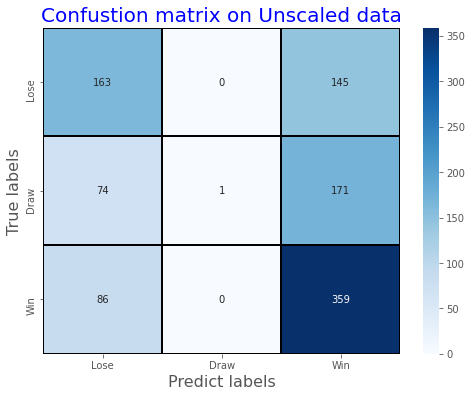

In [ ]:
matrix = confusion_matrix(y_20, y_pred_20)

confuse_matrix = pd.DataFrame(matrix, index = ['Lose', 'Draw' , 'Win'], columns = ['Lose','Draw', 'Win'])

plt.figure(1, figsize = (8,6))
sns.heatmap(confuse_matrix, cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Lose', 'Draw' , 'Win'] , yticklabels = ['Lose', 'Draw' , 'Win'])
plt.xlabel('Predict labels', fontsize=16)
plt.ylabel('True labels', fontsize=16)
plt.title('Confustion matrix on Unscaled data', fontsize=20, c='blue')

- Đạt được f1-score = 0.52
- Model xây dựng được có hiệu quả trên bộ dữ liệu mới có thể coi như tương tự như khi xây dựng trên bộ train và test.


Neural Network xây dựng được có thể hoạt động tốt trên các bộ dữ liệu mới giống như trên dữ liệu cũ. Mặc dù không bị overfitting nhưng hiệu quả dự đoán vẫn còn thấp.

#**Kết luận**

Bài toán đạt được kết quả dự đoán f1-score = 53% trên dữ liệu dùng để xây dựng model từ các mùa giải cũ (mùa giải từ 2010-2019) và f1-score = 52% trên bộ dữ liệu của mùa giải mới (mùa 2020). 

Kết quả dự đoán còn thấp, đặc biệt nhãn Draw không có kết quả dự đoán tốt.

Sau quá trình thử qua các tham số, hiệu quả của các model vẫn không tăng quá đáng kể so với các tham số mặc định. Nguyên nhân có thể từ bộ dữ liệu. Trên thực tế, kết quả của một trận đấu bóng đá chịu ảnh hưởng bởi rất nhiều yếu tố. Số đặc trưng được đưa xem xét còn ít nên chưa đạt được hiệu quả cao.

Để nâng cao kết quả dự đoán:
- Cần đưa vào thêm nhiều yếu tố khác như phong độ thi đấu, tình hình sức khỏe của từng cầu thủ, yếu tố về chiến thuật, huấn luận viên, sân vận động, thời tiết thi đấu hay cả những yếu tố bên ngoài chuyên môn có hưởng đến tâm lý cầu thủ, dẫn đến ảnh hưởng phong độ thi đấu. 
- Cần có sự phân biệt giữa các giải đấu của các quốc gia khác nhau. 
- Các tham số khi tune còn ít về giá trị, đặc biệt là tham số hidden_layer_sizes của Neural Network. Cần tăng thêm số layer cũng như số node mỗi layer để tăng hiệu quả của model.


#**Deploy web app**

In [ ]:
!pip install flask-ngrok

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template, request, url_for, redirect

app = Flask(__name__, template_folder=r'/content/CS114.K21.KHTN/Project/templates')
run_with_ngrok(app)   #starts ngrok when the app is run
@app.route("/")
def home():
    return render_template("input.html")

@app.route("/predict", methods=['POST'])
def predict():
  predict = 'error'
  input = []
  if request.method=='POST':
    var = ['home_rating_GK', 
           'home_rating_DF1', 'home_rating_DF2', 'home_rating_DF3', 'home_rating_DF4', 'home_rating_DF5', 'home_rating_DF6',
           'home_rating_MF1', 'home_rating_MF2', 'home_rating_MF3', 'home_rating_MF4', 'home_rating_MF5', 'home_rating_MF6', 'home_rating_MF7',
           'home_rating_FW1', 'home_rating_FW2', 'home_rating_FW3', 'home_rating_FW4',
           'home_avg_age',
           'home_number_win', 'home_number_draw',
           'home_number_goals', 'home_number_against_goals',
           'away_rating_GK', 
           'away_rating_DF1', 'away_rating_DF2', 'away_rating_DF3', 'away_rating_DF4', 'away_rating_DF5', 'away_rating_DF6',
           'away_rating_MF1', 'away_rating_MF2', 'away_rating_MF3', 'away_rating_MF4', 'away_rating_MF5', 'away_rating_MF6', 'away_rating_MF7',
           'away_rating_FW1', 'away_rating_FW2', 'away_rating_FW3', 'away_rating_FW4',
           'away_avg_age',
           'away_number_win', 'away_number_draw',
           'away_number_goals', 'away_number_against_goals']
    for v in var:
      input.append(request.form[v])
    input = np.array(input)
    input = input.reshape(1,-1)
    input = scaler.transform(input)
    model_predict = final_mlp.predict(input)
    if model_predict == 0:
      predict = "DRAW"
    if model_predict == 1:
      predict = "HOME TEAM WIN!"
    else:
      predict = "AWAY TEAM WIN!"

  return predict

 
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://f7aacc023760.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [29/Jul/2020 07:19:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Jul/2020 07:19:56] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [29/Jul/2020 07:20:00] "GET / HTTP/1.1" 200 -
